In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
from scipy.stats import t
from scipy import stats

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings("ignore")
#pd.options.display.float_format="{:20,.2f}".format
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

%matplotlib inline

In [2]:
df = pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df.duplicated().sum()

0

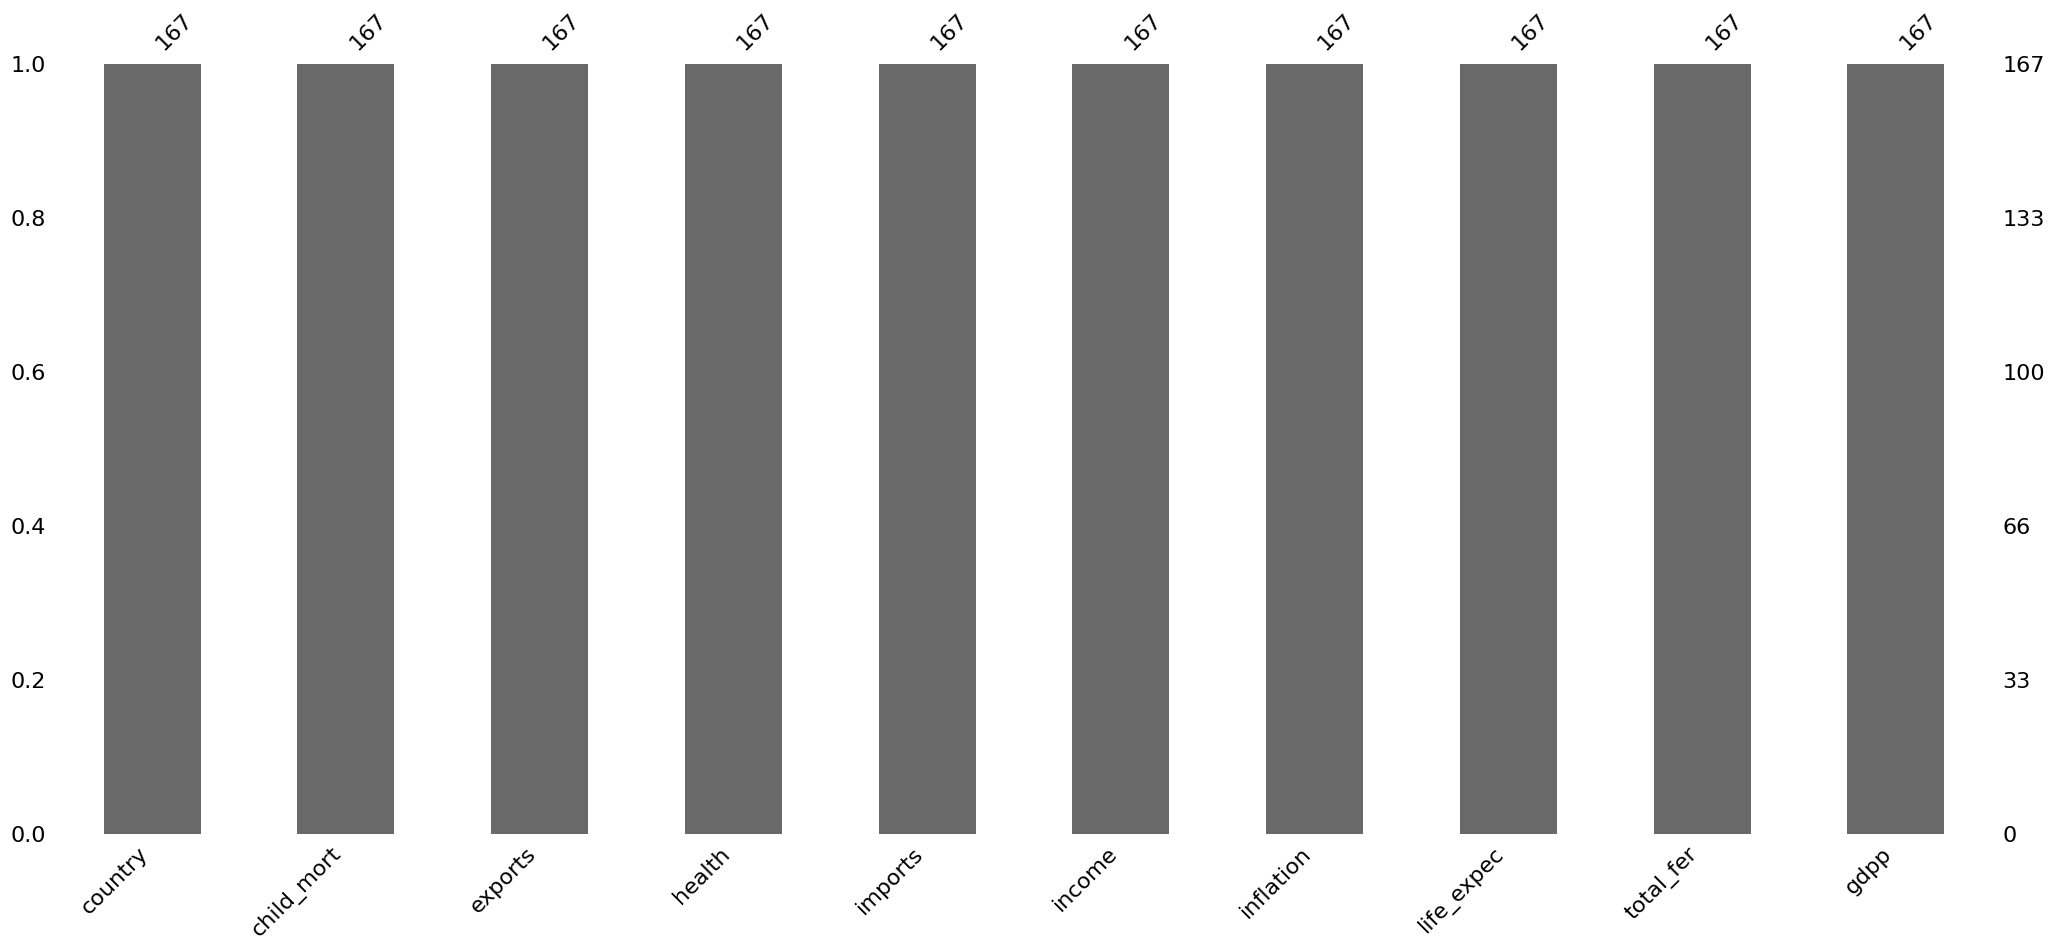

In [4]:
msno.bar(df)
plt.show()

In [5]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


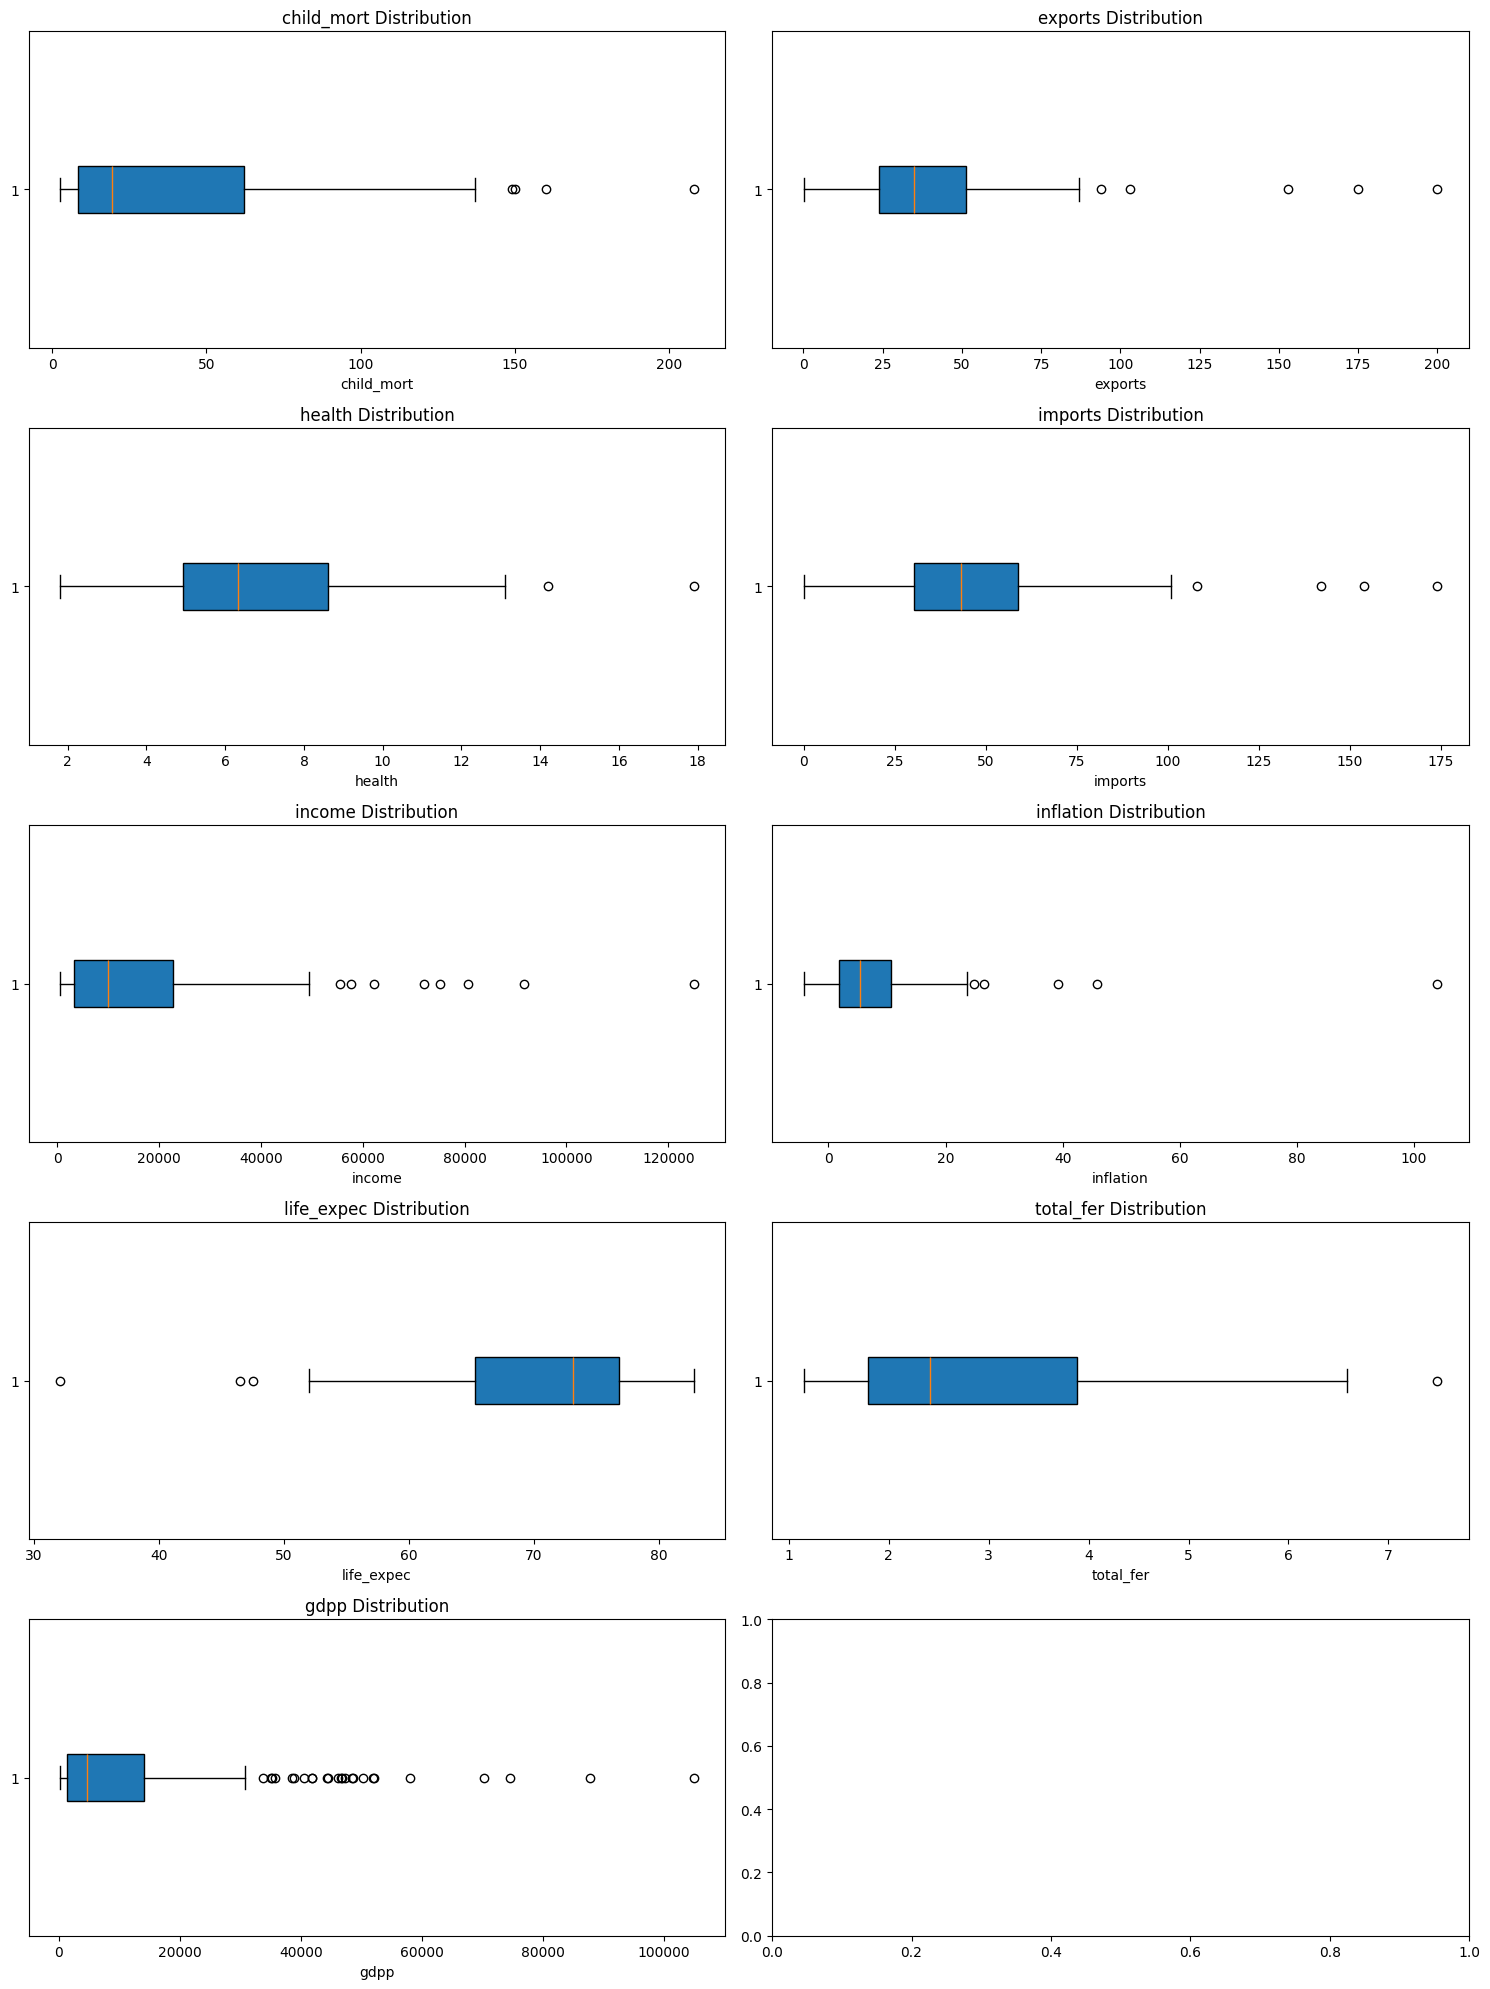

In [8]:
col = list(df.columns) # list of columns
col.pop(0) # drop country's column from list of columns
numerical_features = iter(col)
namecol=next(numerical_features)

# Plot the dataframe
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15,20))

for x in range(5):
    for y in range(2):
        try:
            axes[x,y].boxplot(df[namecol], vert=False, patch_artist=True)
            axes[x,y].set_xlabel(namecol)
            axes[x,y].set_title(namecol+' Distribution') 
            namecol=next(numerical_features)
        except StopIteration:
            break
plt.tight_layout()
plt.show()

In [9]:
df['exports'] = df['exports']*df['gdpp']/100
df['imports'] = df['imports']*df['gdpp']/100
df['health'] = df['health']*df['gdpp']/100

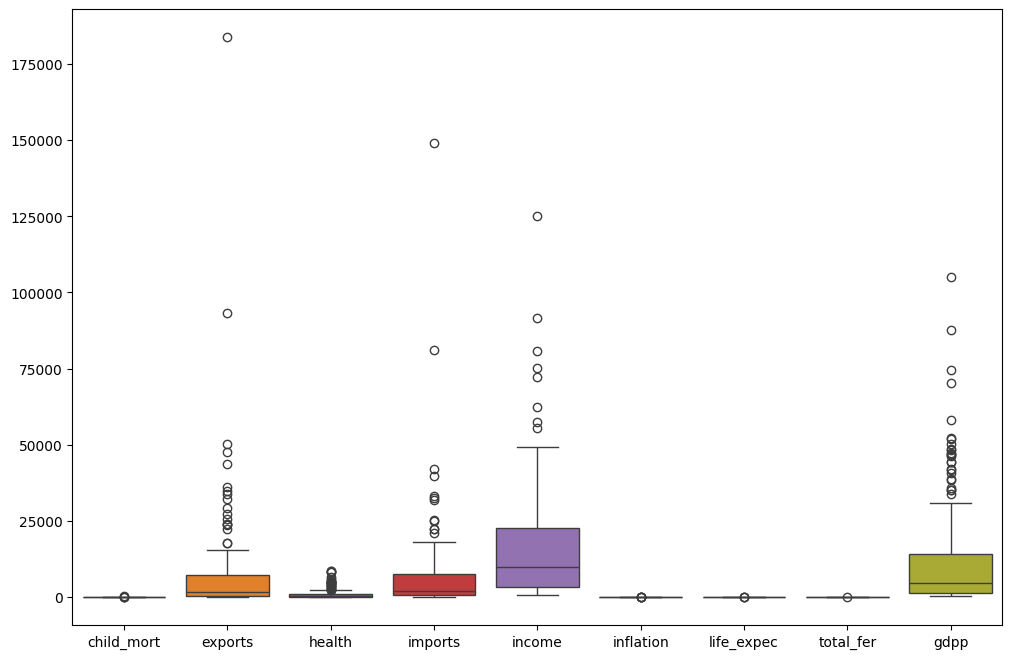

In [10]:
fig = plt.figure(figsize = (12,8))
sns.boxplot(data=df)
plt.show()

In [11]:
print("There are",df.shape[0], "countries in the dataset")


There are 167 countries in the dataset


In [12]:
import plotly.express as px
columns=['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']

colors = ["rgb(255, 51, 51)", "rgb(210, 231, 154)", "rgb(94, 179, 39)", "rgb(67, 136, 33)", "rgb(33, 74, 12)"]

for i in columns:
  fig = px.choropleth(df,
                    locationmode='country names',
                    locations='country',
                    color= i,
                    title="Each Country's "+ i,
                    color_continuous_scale=colors
                   )

  fig.show()

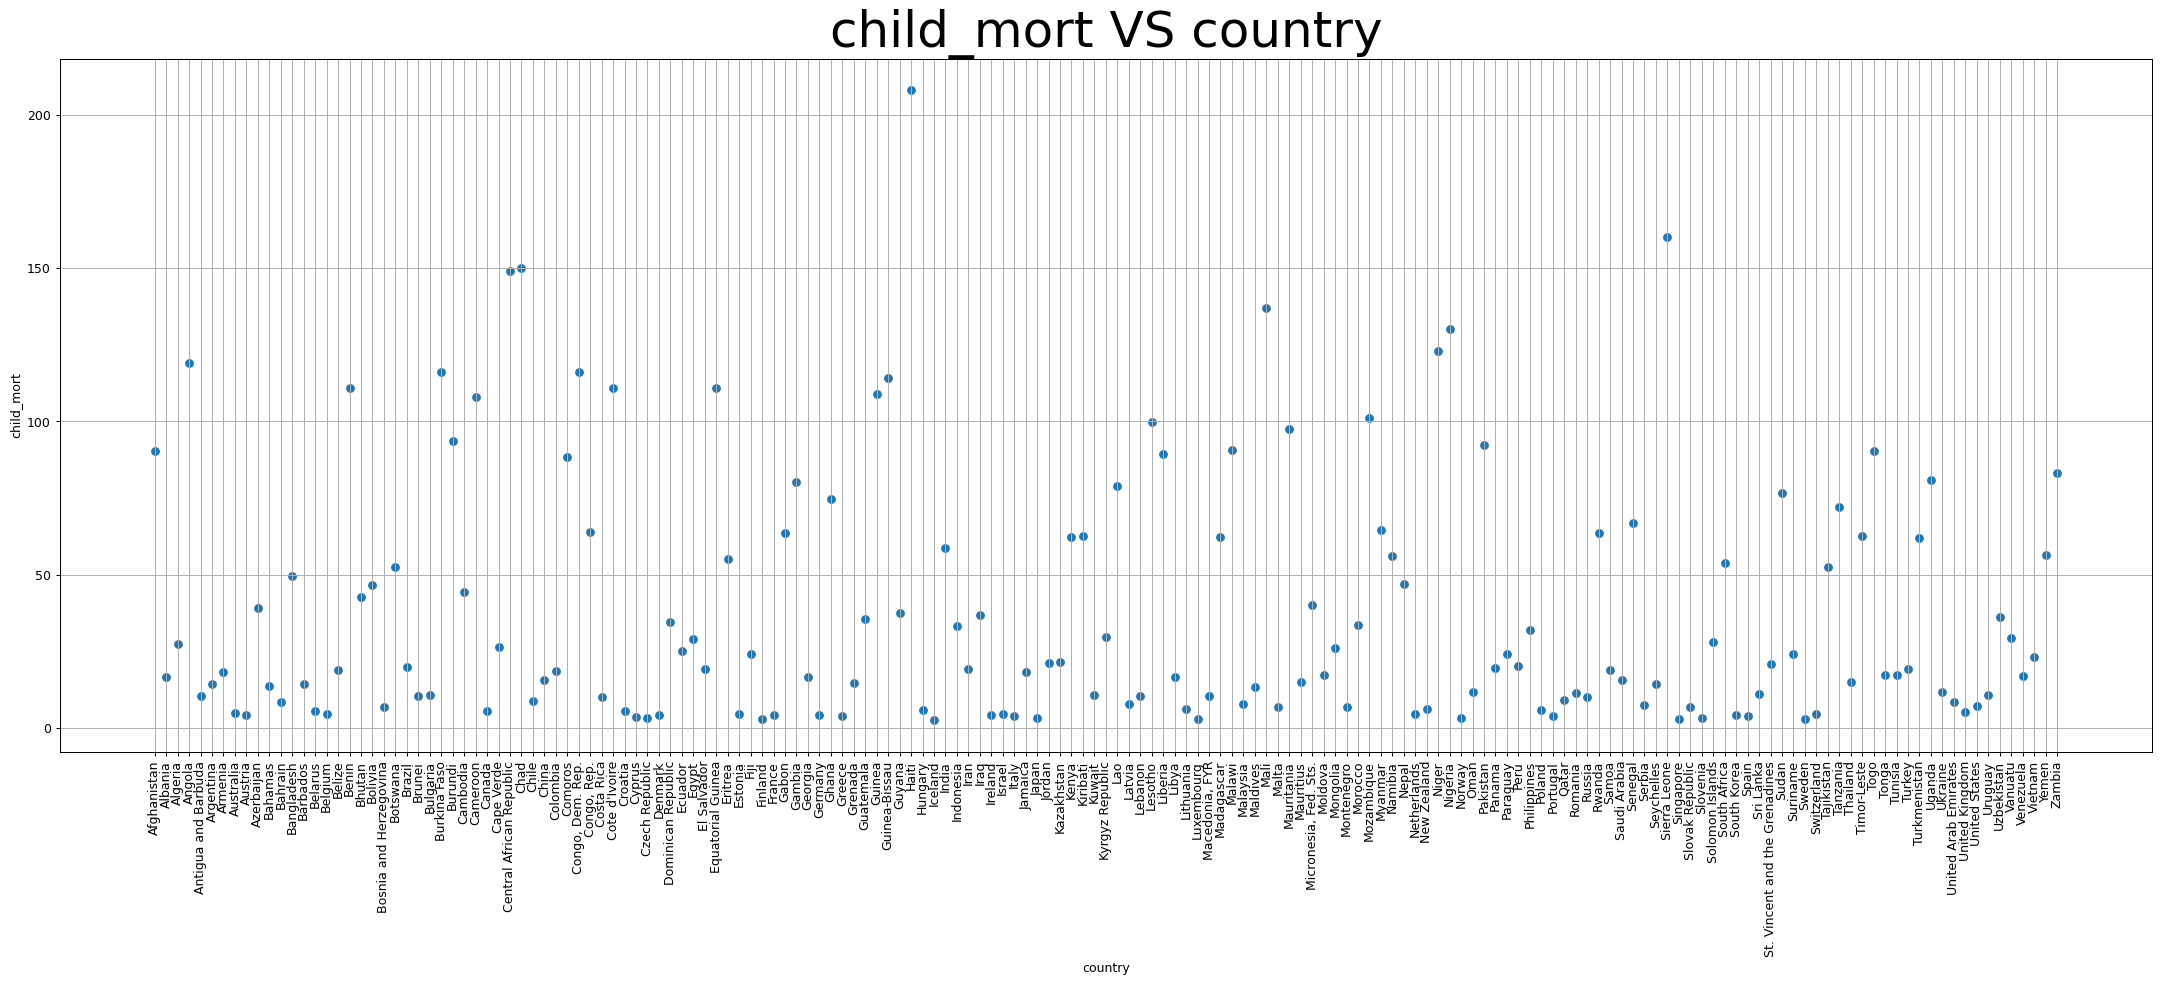

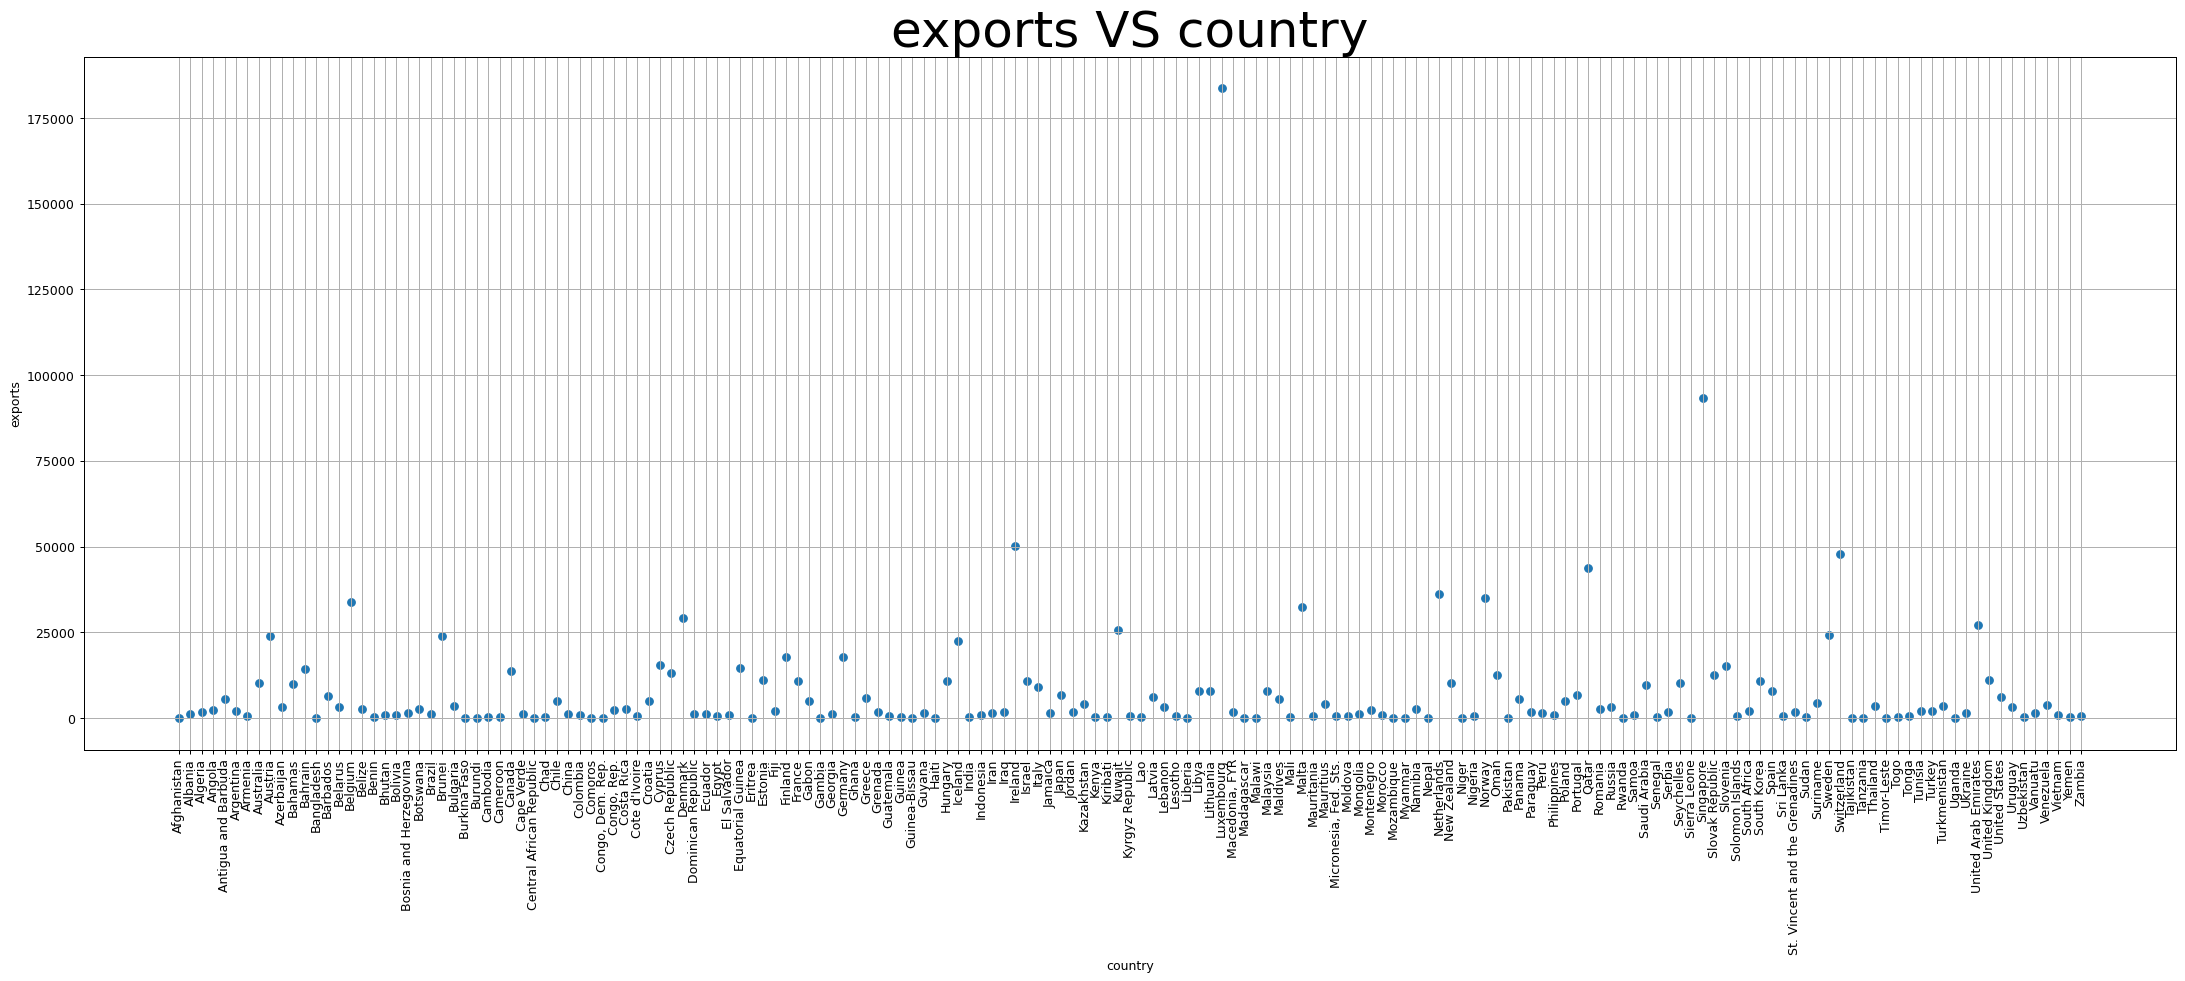

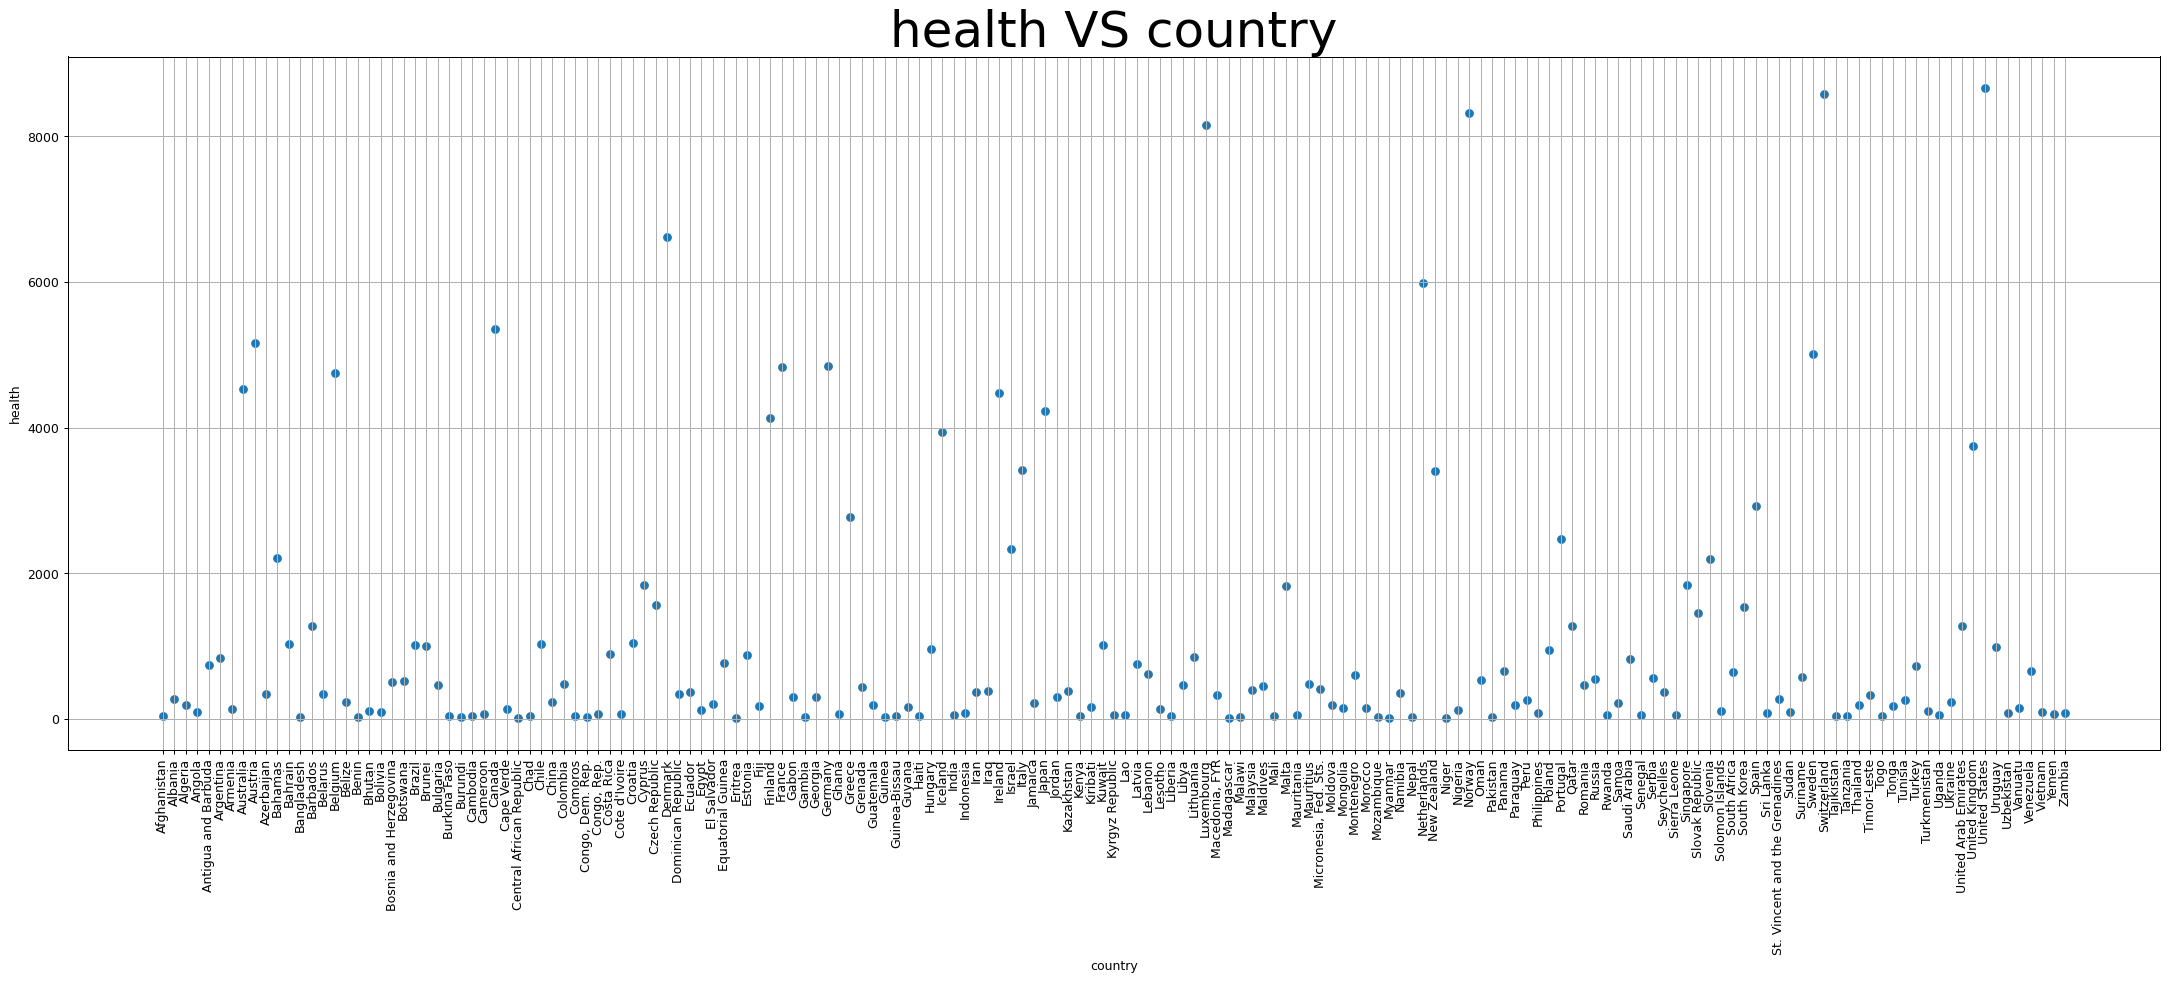

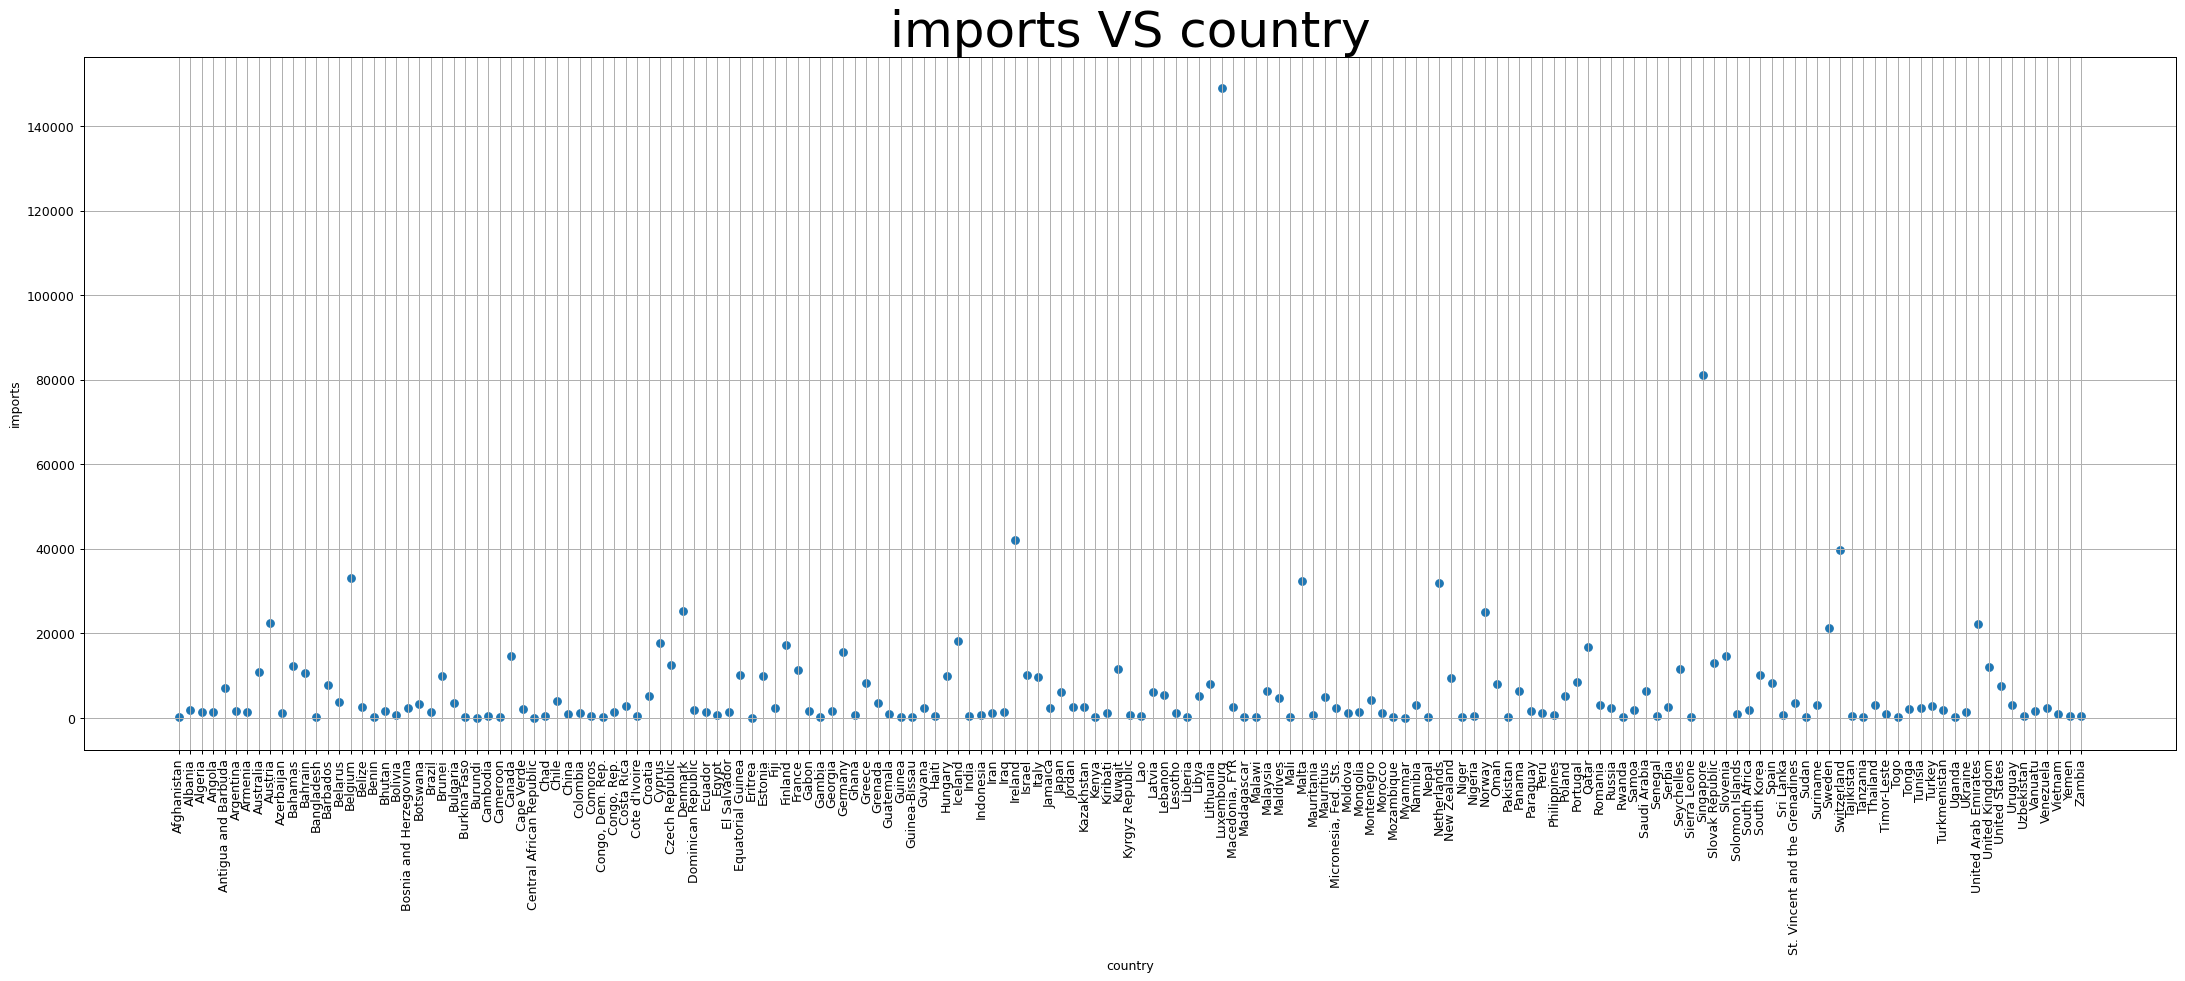

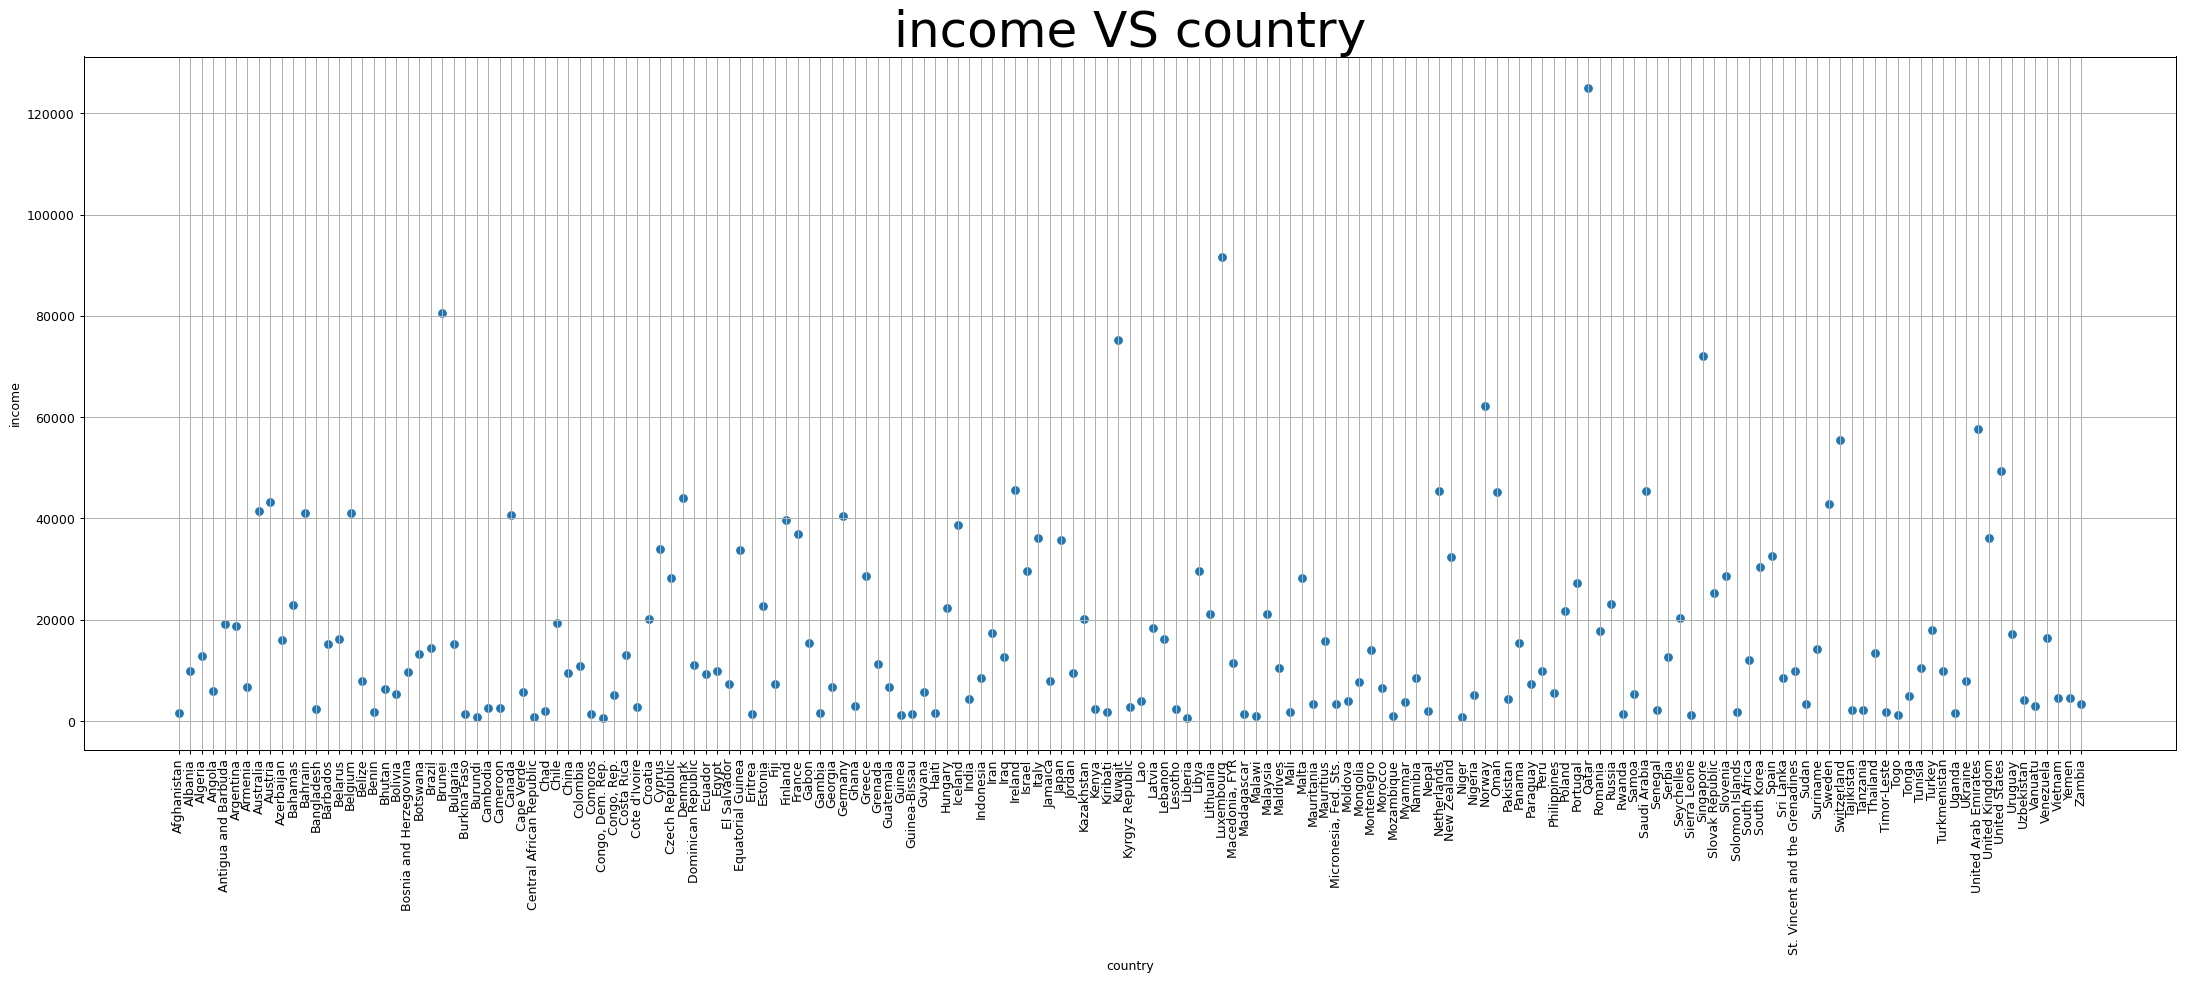

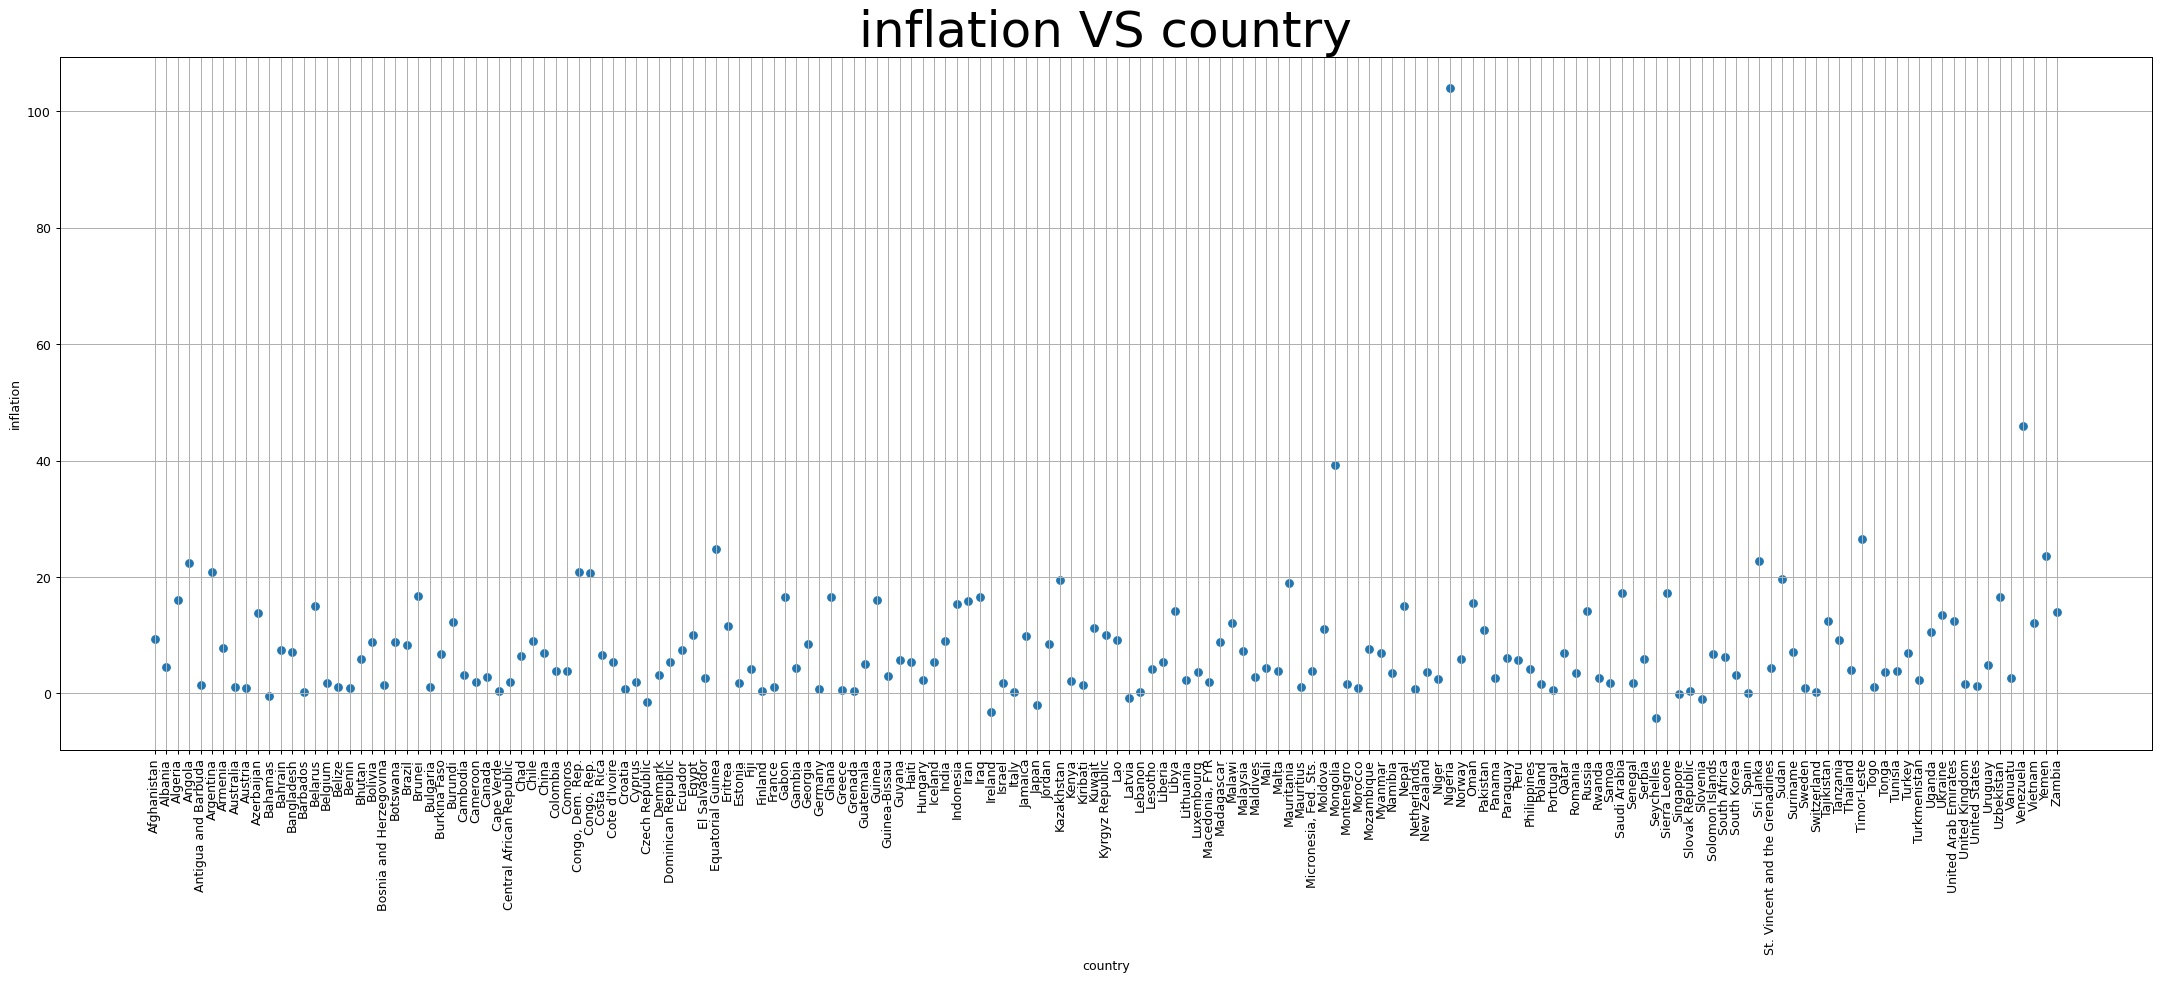

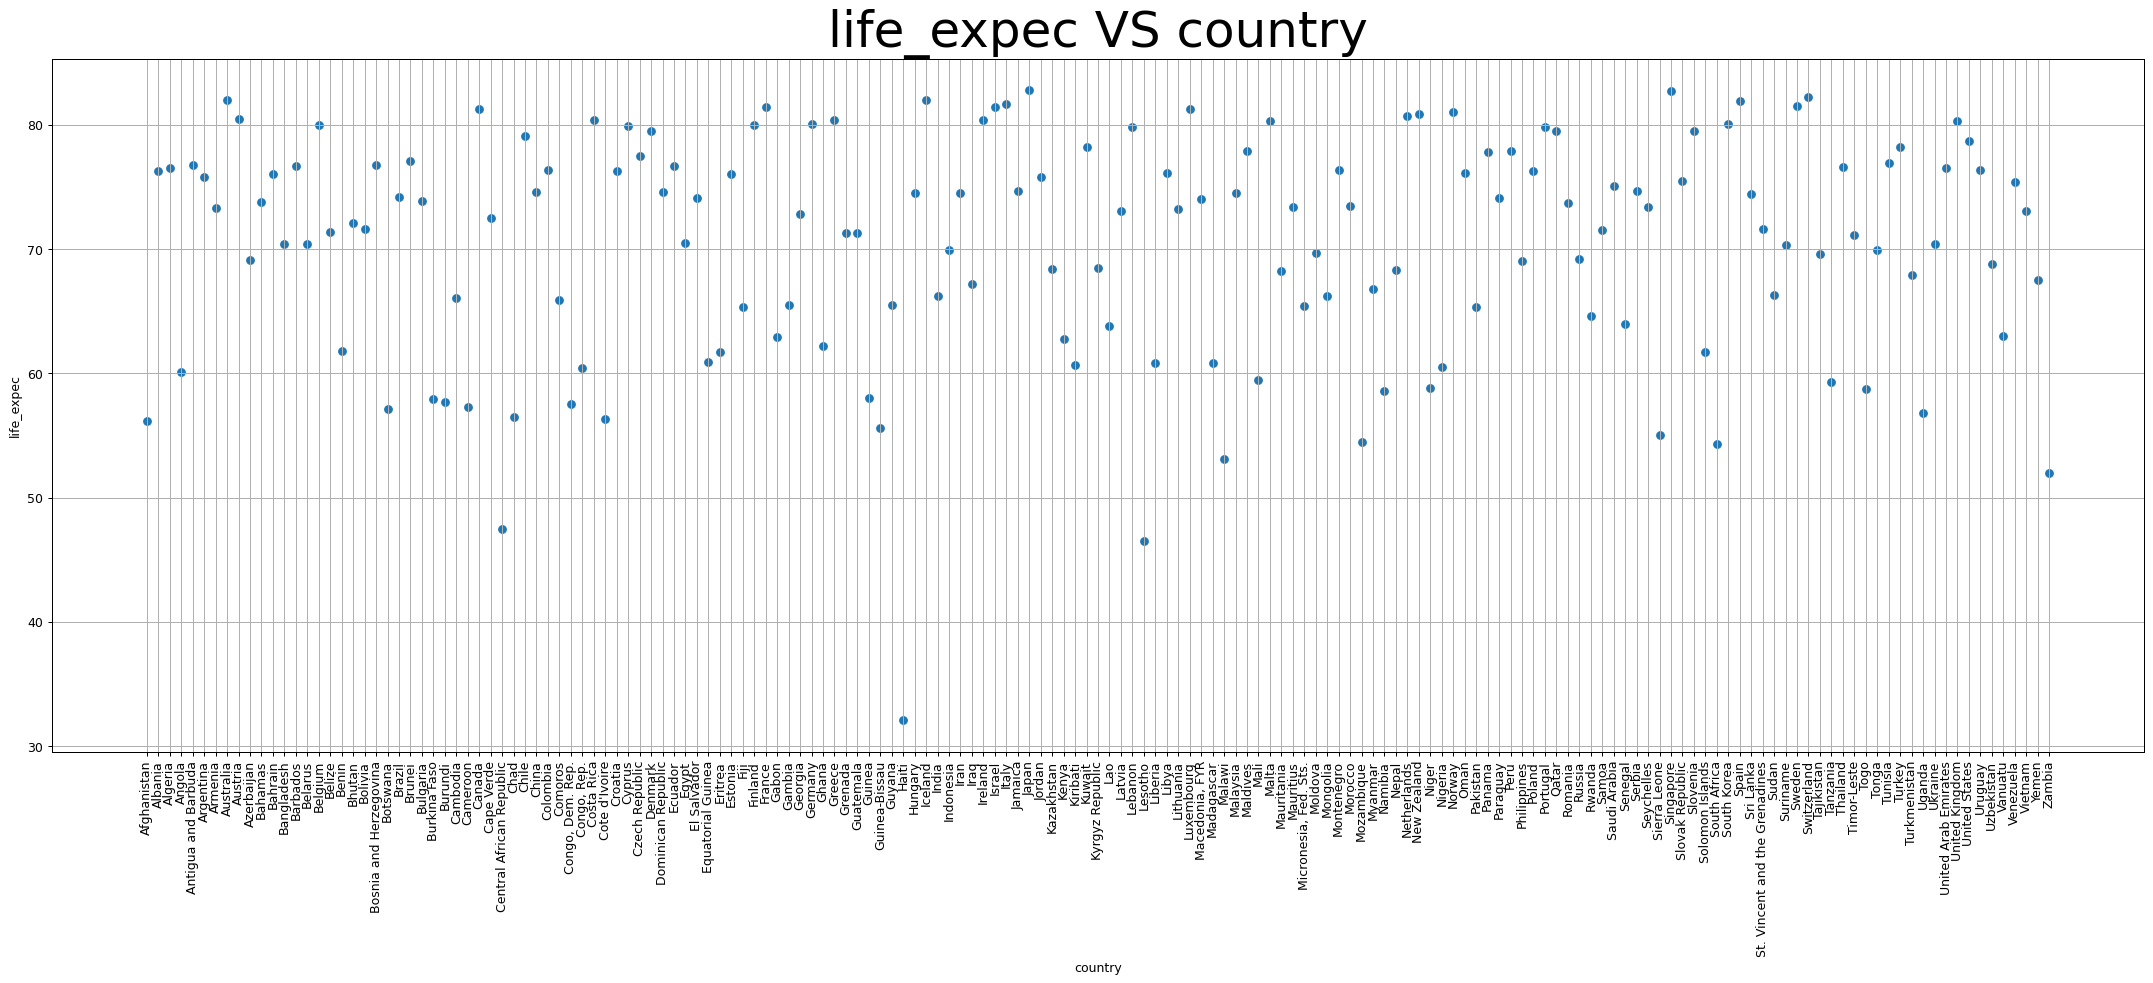

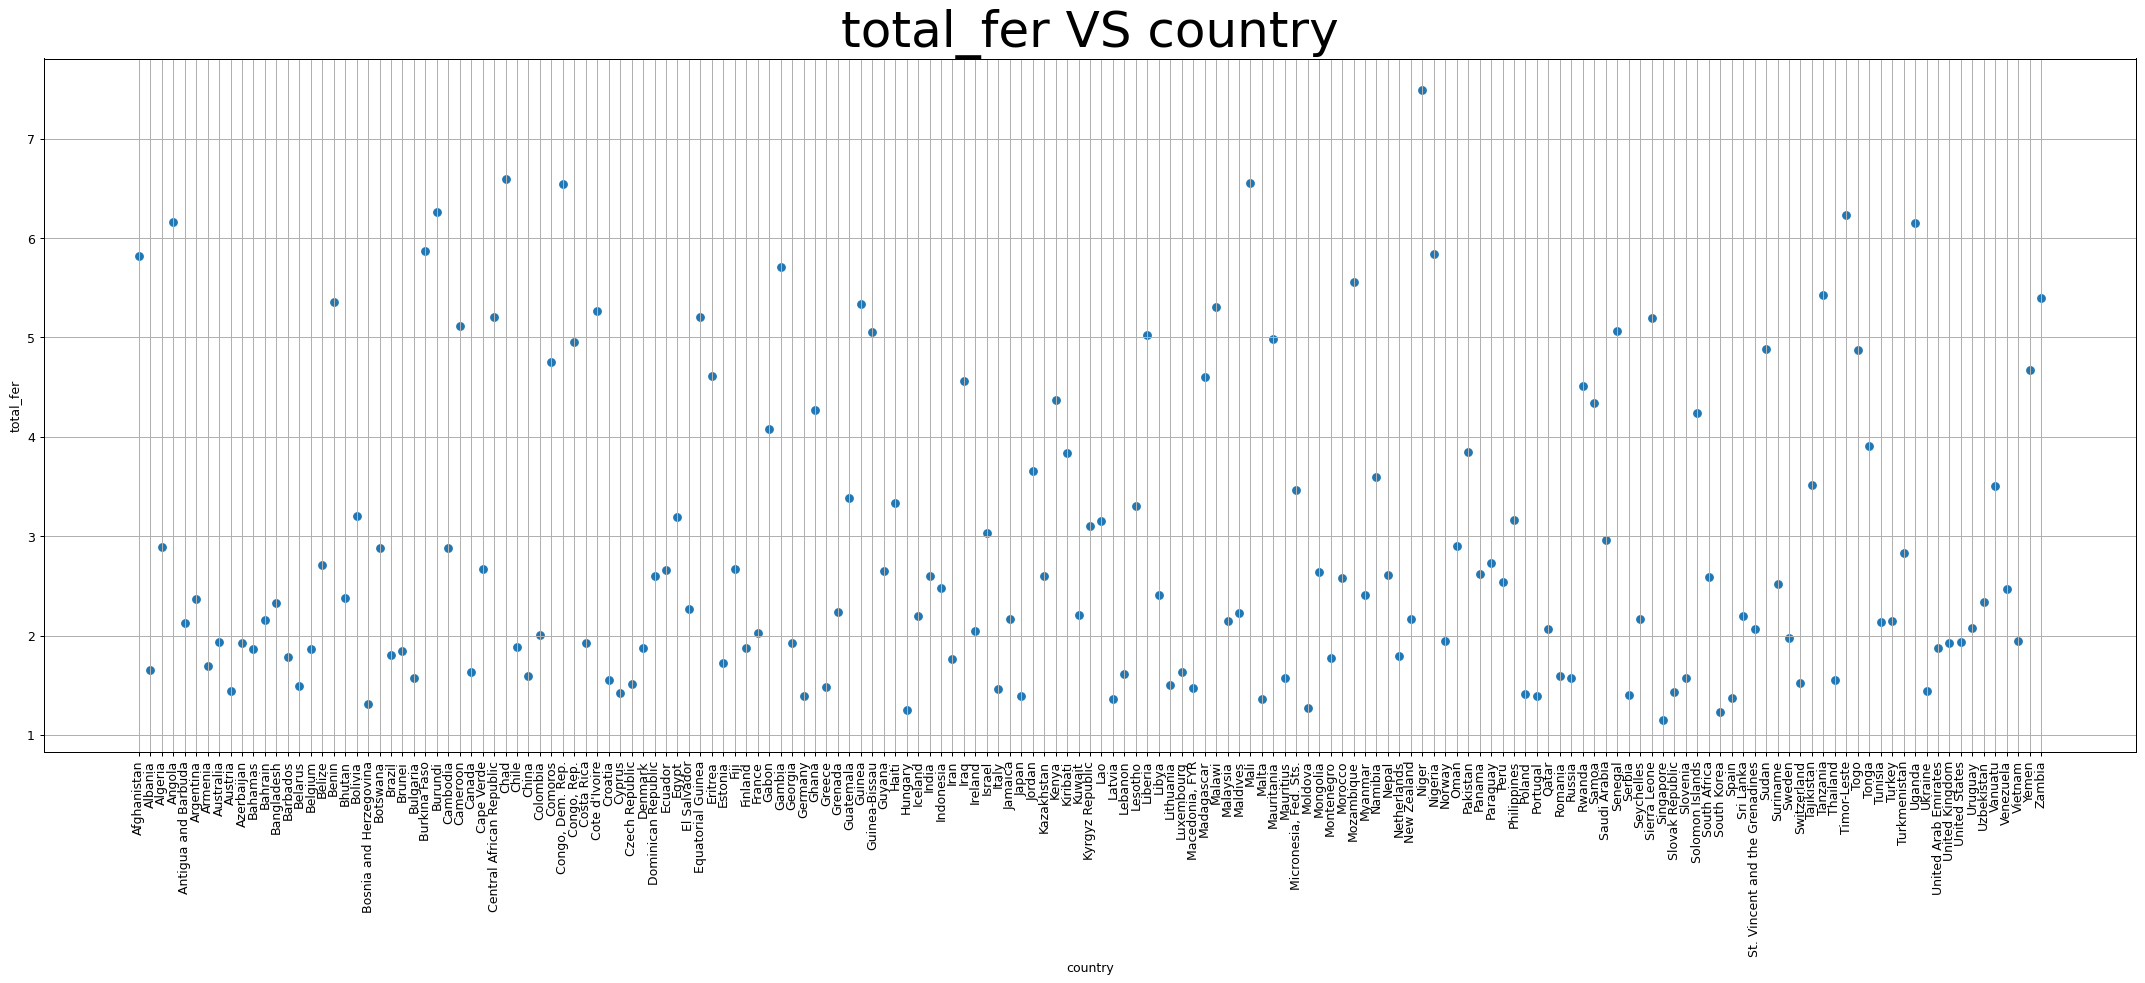

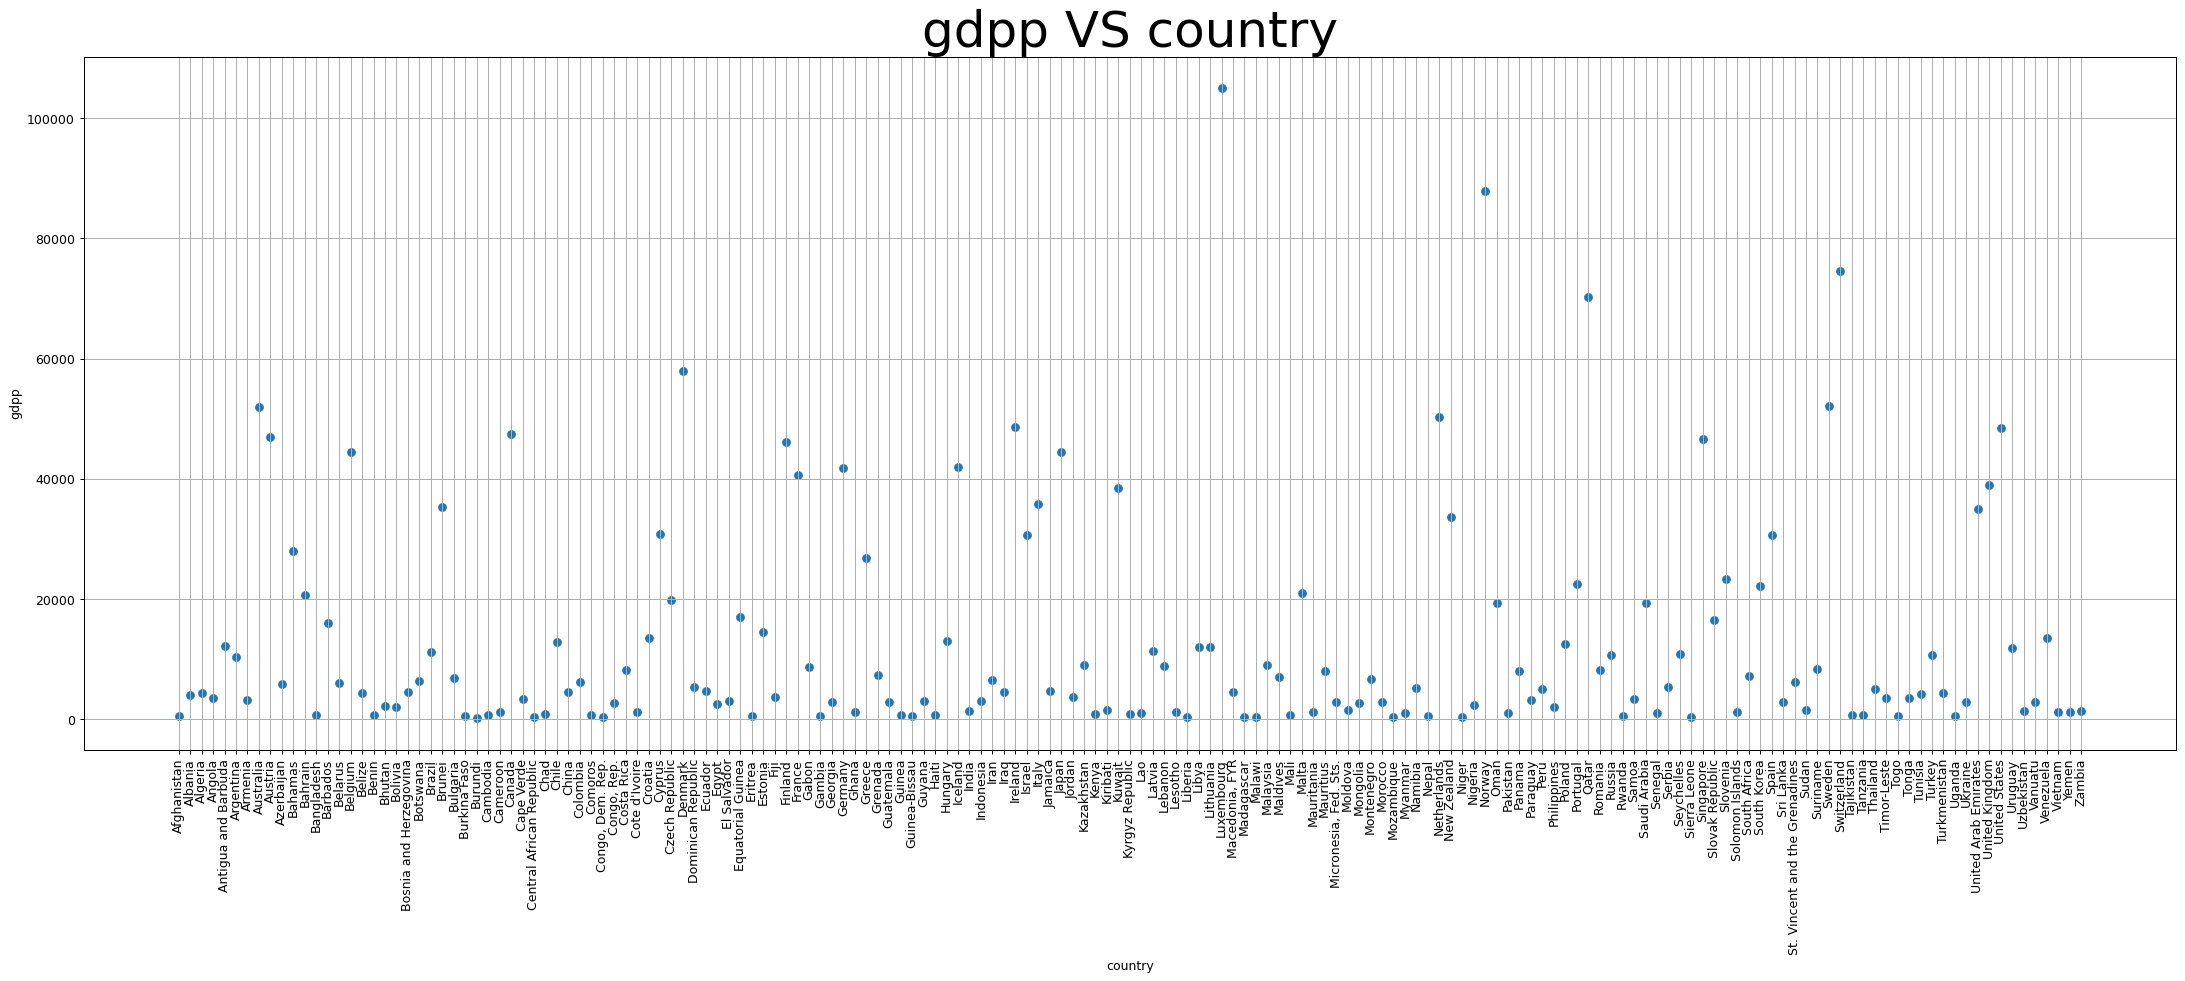

In [13]:
columns=['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
for i in columns :
    plt.figure(figsize=(30,10),dpi=90)
    plt.scatter(df["country"],df[i])
    plt.title(i + " VS country" , fontsize=40)
    plt.ylabel(i)
    plt.xlabel('country')
    plt.xticks(fontsize=10)
    plt.xticks(rotation=90)
    plt.grid()
    plt.show()

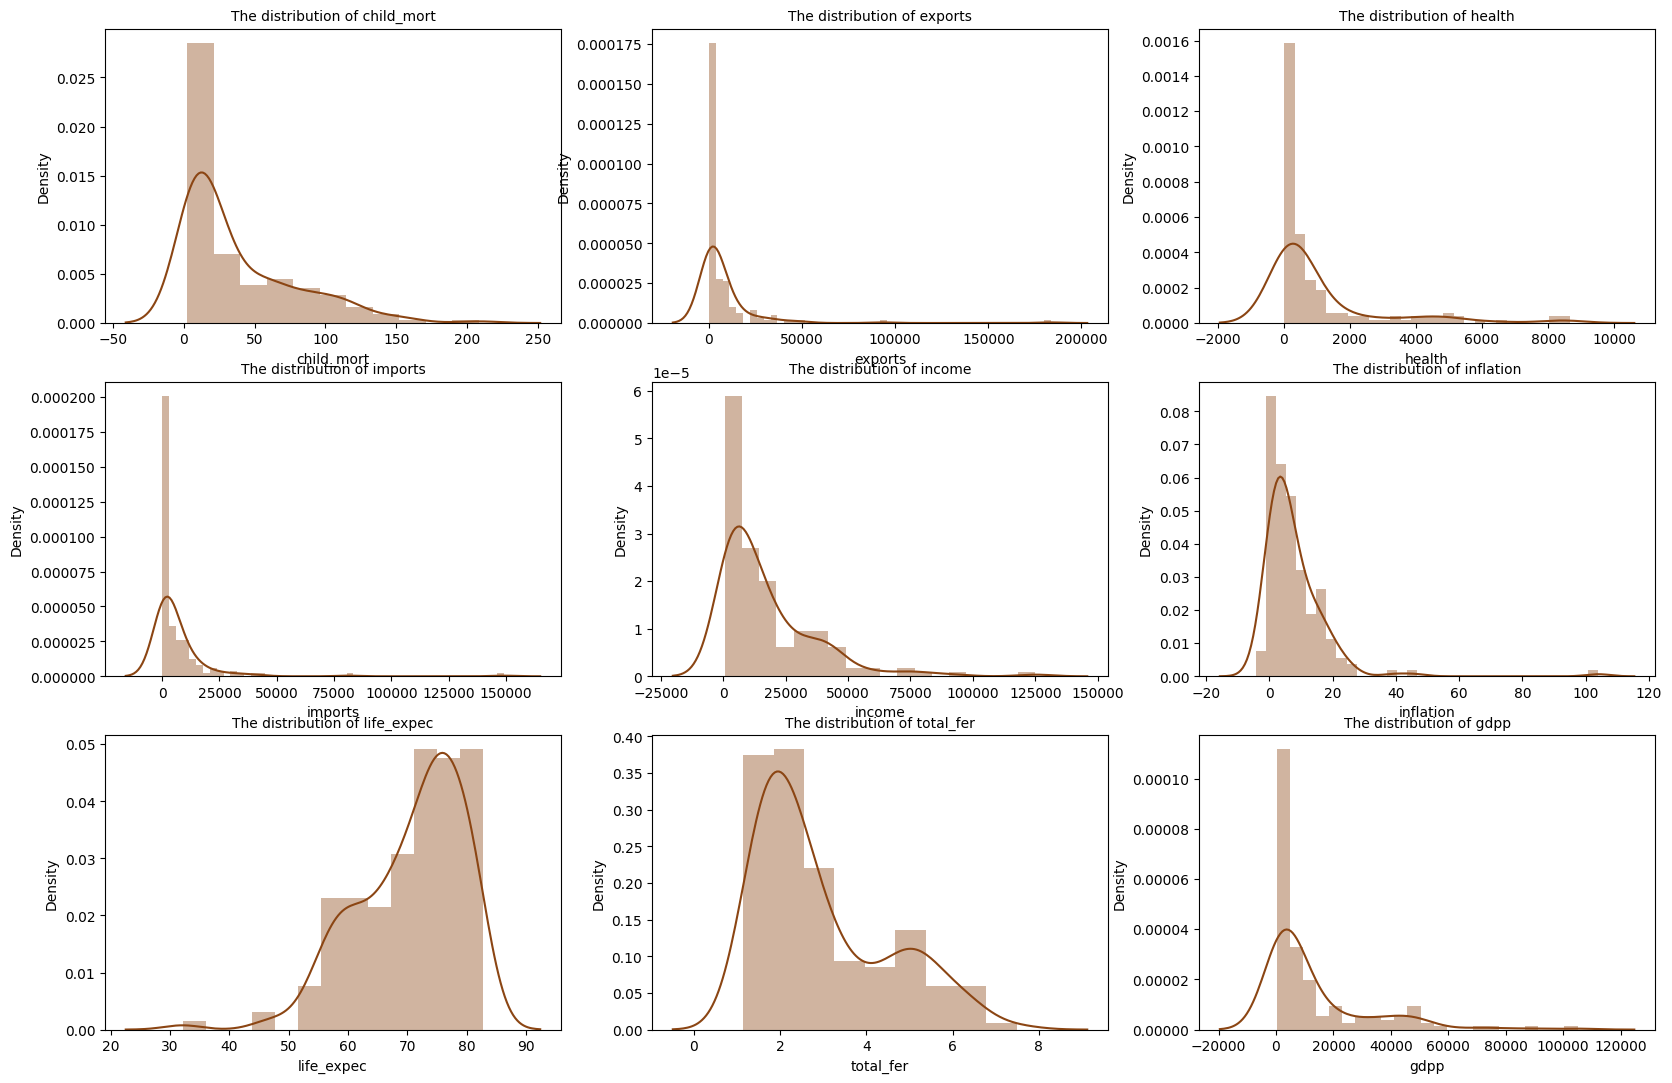

In [14]:
columns=['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
fig, ax = plt.subplots(nrows = 3,ncols =3,figsize = (20,13))
for i in range(len(columns)):
    plt.subplot(3,3,i+1)
    sns.distplot(df[columns[i]],color ='#8B4513' )
    plt.title("The distribution of " + columns[i], fontsize=10)
plt.show()

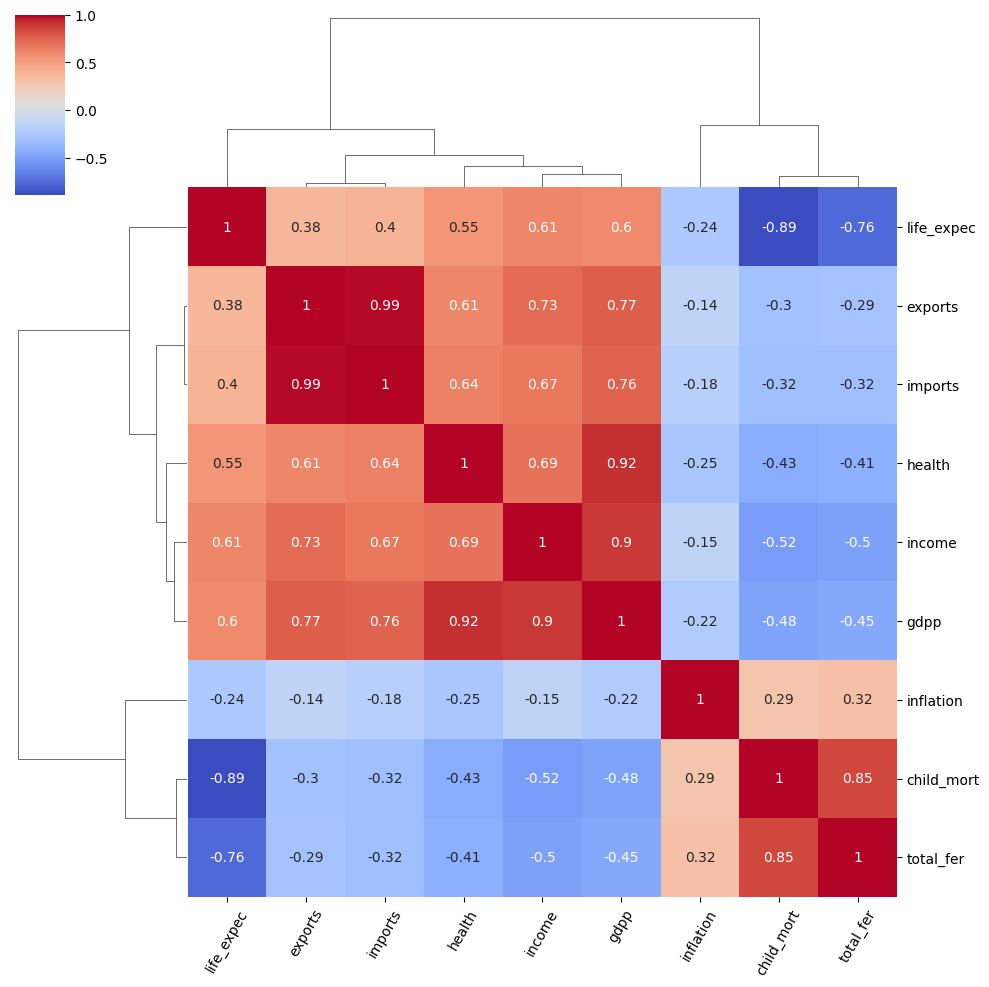

In [15]:
ax = sns.clustermap(df.corr(), 
                   method = 'complete', 
                   cmap   = 'coolwarm', 
                   annot  = True, 
                   annot_kws = {'size': 10})
plt.setp(ax.ax_heatmap.get_xticklabels(), rotation=60);

In [17]:
# Countried with high GDPP
df[df['gdpp']>df['gdpp'].quantile(.95)]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
7,Australia,4.8,10276.2,4530.87,10847.1,41400,1.160,82.0,1.93,51900
44,Denmark,4.1,29290.0,6612.00,25288.0,44000,3.220,79.5,1.87,58000
73,Ireland,4.2,50161.0,4475.53,42125.5,45700,-3.220,80.4,2.05,48700
91,Luxembourg,2.8,183750.0,8158.50,149100.0,91700,3.620,81.3,1.63,105000
110,Netherlands,4.5,36216.0,5985.70,31990.8,45500,0.848,80.7,1.79,50300
114,Norway,3.2,34856.6,8323.44,25023.0,62300,5.950,81.0,1.95,87800
123,Qatar,9.0,43796.9,1272.43,16731.4,125000,6.980,79.5,2.07,70300
144,Sweden,3.0,24070.2,5017.23,21204.7,42900,0.991,81.5,1.98,52100
145,Switzerland,4.5,47744.0,8579.00,39761.8,55500,0.317,82.2,1.52,74600


In [18]:
df.shape

(167, 10)

In [19]:
df1 = df[df['gdpp']<df['gdpp'].quantile(.95)]

In [20]:
df1.shape

(158, 10)

In [21]:
childmortality_high = df1.sort_values(by='child_mort', ascending=False)

In [22]:
childmortality_high.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.20,55.0,5.20,399
32,Chad,150.0,330.096,40.6341,390.195,1930,6.39,56.5,6.59,897
31,Central African Republic,149.0,52.628,17.7508,118.190,888,2.01,47.5,5.21,446
97,Mali,137.0,161.424,35.2584,248.508,1870,4.37,59.5,6.55,708
113,Nigeria,130.0,589.490,118.1310,405.420,5150,104.00,60.5,5.84,2330
112,Niger,123.0,77.256,17.9568,170.868,814,2.55,58.8,7.49,348
3,Angola,119.0,2199.190,100.6050,1514.370,5900,22.40,60.1,6.16,3530
37,"Congo, Dem. Rep.",116.0,137.274,26.4194,165.664,609,20.80,57.5,6.54,334
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430,6.81,57.9,5.87,575


In [23]:
childmortality_low = df1.sort_values(by='child_mort', ascending=True)

In [24]:
childmortality_low.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
68,Iceland,2.6,22374.6,3938.60,18142.7,38800,5.470,82.0,2.20,41900
133,Singapore,2.8,93200.0,1845.36,81084.0,72100,-0.046,82.7,1.15,46600
53,Finland,3.0,17879.4,4134.90,17278.8,39800,0.351,80.0,1.87,46200
135,Slovenia,3.2,15046.2,2201.94,14718.6,28700,-0.987,79.5,1.57,23400
77,Japan,3.2,6675.0,4223.05,6052.0,35800,-1.900,82.8,1.39,44500
43,Czech Republic,3.4,13068.0,1560.24,12454.2,28300,-1.430,77.5,1.51,19800
42,Cyprus,3.6,15461.6,1838.76,17710.0,33900,2.010,79.9,1.42,30800
139,Spain,3.8,7828.5,2928.78,8227.6,32500,0.160,81.9,1.37,30700
60,Greece,3.9,5944.9,2770.70,8258.3,28700,0.673,80.4,1.48,26900
122,Portugal,3.9,6727.5,2475.00,8415.0,27200,0.643,79.8,1.39,22500


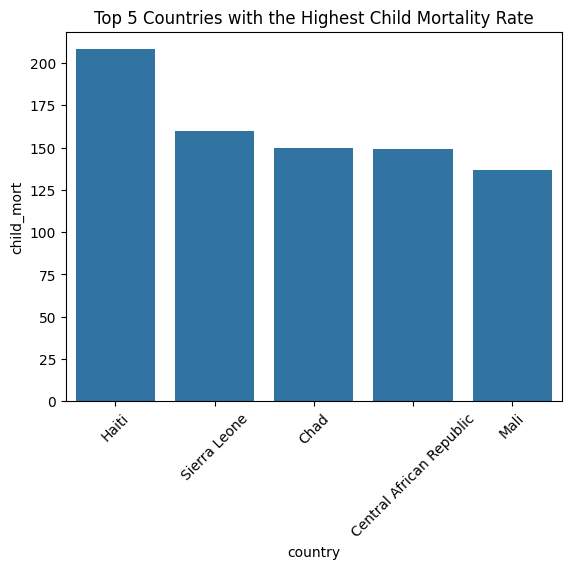

In [25]:
sns.barplot(childmortality_high.iloc[:5],x='country',y='child_mort')
plt.title ('Top 5 Countries with the Highest Child Mortality Rate')
plt.xticks(rotation=45);

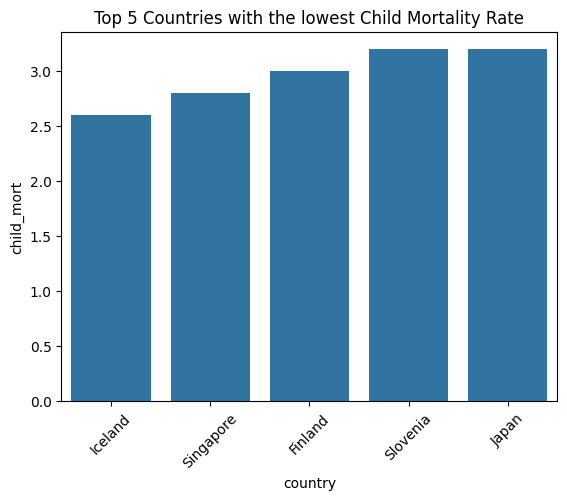

In [26]:
sns.barplot(childmortality_low.iloc[:5],x='country',y='child_mort')
plt.title ('Top 5 Countries with the lowest Child Mortality Rate')
plt.xticks(rotation=45);

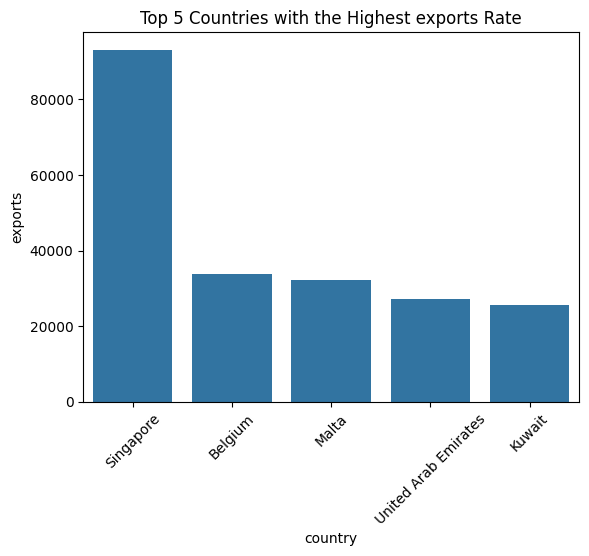

In [29]:
exports = df1.sort_values(by='exports', ascending=False)
sns.barplot(exports.iloc[:5],x='country',y='exports')
plt.title ('Top 5 Countries with the Highest exports Rate')
plt.xticks(rotation=45);

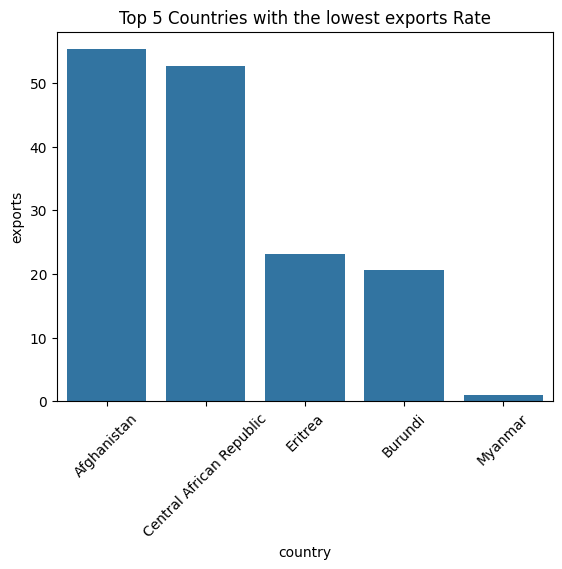

In [30]:

sns.barplot(exports.iloc[-5:],x='country',y='exports')
plt.title ('Top 5 Countries with the lowest exports Rate')
plt.xticks(rotation=45);

In [32]:
features = df1.columns
standard_scaler = StandardScaler()
countries_scaled= standard_scaler.fit_transform(df1.drop('country', axis=1))
countries_scaled

array([[ 1.2348468 , -0.51008966, -0.56360764, ..., -1.57290118,
         1.83898931, -0.73837646],
       [-0.58270965, -0.39606338, -0.39146172, ...,  0.7236459 ,
        -0.88967589, -0.45936668],
       [-0.3184725 , -0.33669732, -0.45386166, ...,  0.74649712,
        -0.07827425, -0.4301799 ],
       ...,
       [-0.41725274, -0.4171968 , -0.5272808 , ...,  0.35802647,
        -0.69336904, -0.6786619 ],
       [ 0.39768425, -0.4747592 , -0.54384653, ..., -0.28180754,
         1.08647972, -0.6786619 ],
       [ 1.05951187, -0.45935901, -0.53003083, ..., -2.05277669,
         1.56415972, -0.66682942]])

K Means

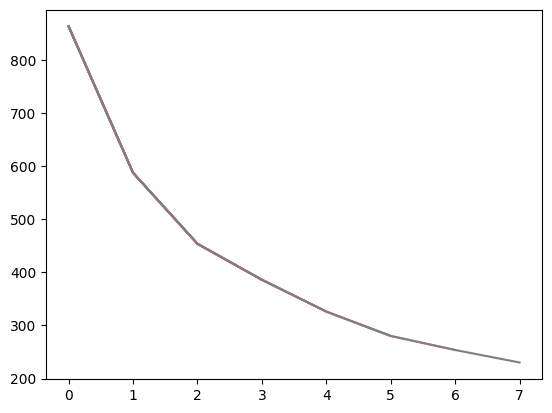

In [34]:
score=[]
for i in range(2,10):
    km = KMeans(n_clusters=i)
    km.fit(countries_scaled)
    score.append(km.inertia_)
    plt.plot(score,)


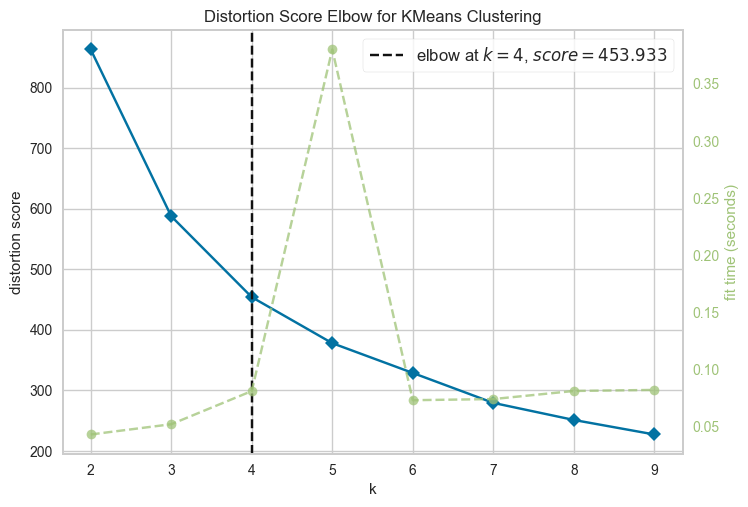

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(n_clusters=i)
visualizer = KElbowVisualizer(model, k=(2,10), timings= True)
visualizer.fit(countries_scaled)        # Fit data to visualizer
visualizer.show() 

In [36]:
from sklearn.metrics import silhouette_score
for i in range(3,11):
    km = KMeans(n_clusters=i, random_state=4)
    km.fit_predict(countries_scaled)
    score = silhouette_score(countries_scaled, km.labels_, metric='euclidean')
    print('Silhouetter Average Score for {} clusters is {}:'.format(i,score))

Silhouetter Average Score for 3 clusters is 0.41495653220376433:
Silhouetter Average Score for 4 clusters is 0.4237047080729114:
Silhouetter Average Score for 5 clusters is 0.4269917078918058:
Silhouetter Average Score for 6 clusters is 0.3134093837899716:
Silhouetter Average Score for 7 clusters is 0.30386007119412284:
Silhouetter Average Score for 8 clusters is 0.2936591733739597:
Silhouetter Average Score for 9 clusters is 0.25832154677392427:
Silhouetter Average Score for 10 clusters is 0.3006108620107434:


In [37]:
km = KMeans(n_clusters=5)
y = km.fit_predict(countries_scaled)

In [38]:
countries_kmeans = df1.copy()
countries_kmeans['Labels'] = y
countries_kmeans.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


In [39]:
countries_kmeans['Labels'].value_counts()

0    81
2    46
1    29
4     1
3     1
Name: Labels, dtype: int64

[Text(0.5, 0, 'GDPP'), Text(0, 0.5, 'Child Mortality Rate')]

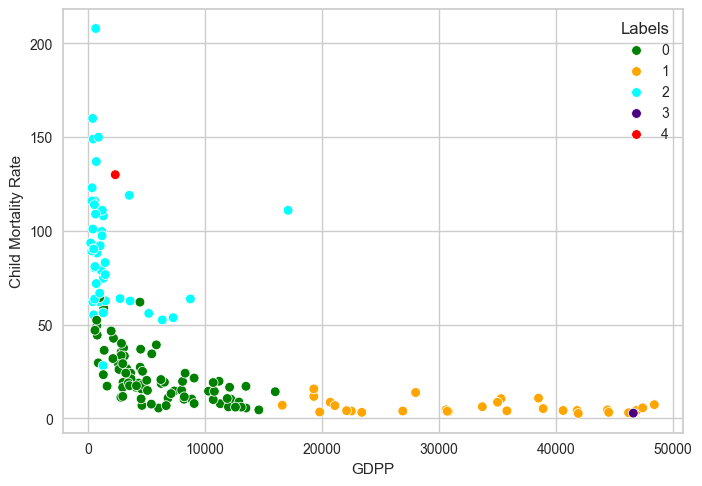

In [40]:
axes = sns.scatterplot(x='gdpp',y='child_mort',hue='Labels',legend='full',data=countries_kmeans, palette=['green','orange','cyan','indigo','red'])
axes.set(xlabel = 'GDPP', ylabel= 'Child Mortality Rate')

[Text(0.5, 0, 'health'), Text(0, 0.5, 'Child Mortality Rate')]

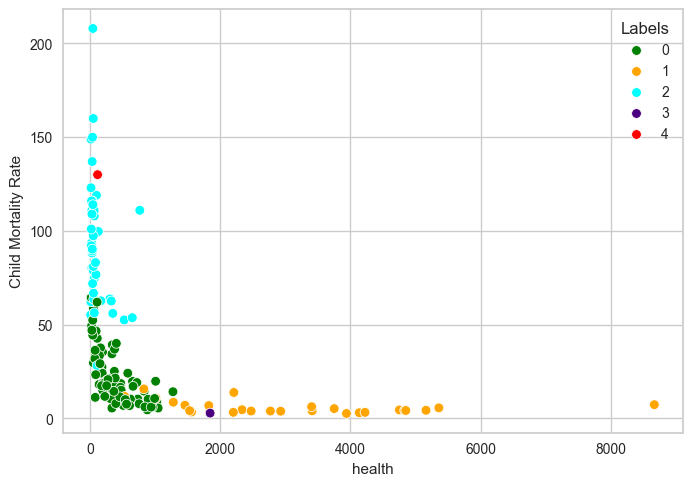

In [41]:
axes = sns.scatterplot(x='health',y='child_mort',hue='Labels',legend='full',data=countries_kmeans, palette=['green','orange','cyan','indigo','red'])
axes.set(xlabel = 'health', ylabel= 'Child Mortality Rate')

[Text(0.5, 0, 'life_expec'), Text(0, 0.5, 'Child Mortality Rate')]

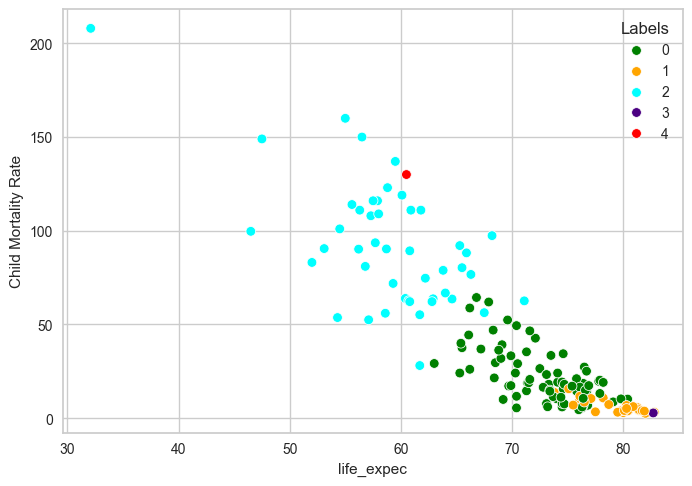

In [42]:
axes = sns.scatterplot(x='life_expec',y='child_mort',hue='Labels',legend='full',data=countries_kmeans, palette=['green','orange','cyan','indigo','red'])
axes.set(xlabel = 'life_expec', ylabel= 'Child Mortality Rate')

PCA

In [45]:
distance = 1-cosine_similarity(countries_scaled)
pca = PCA(2)
pca_1_2 = pca.fit_transform(distance)

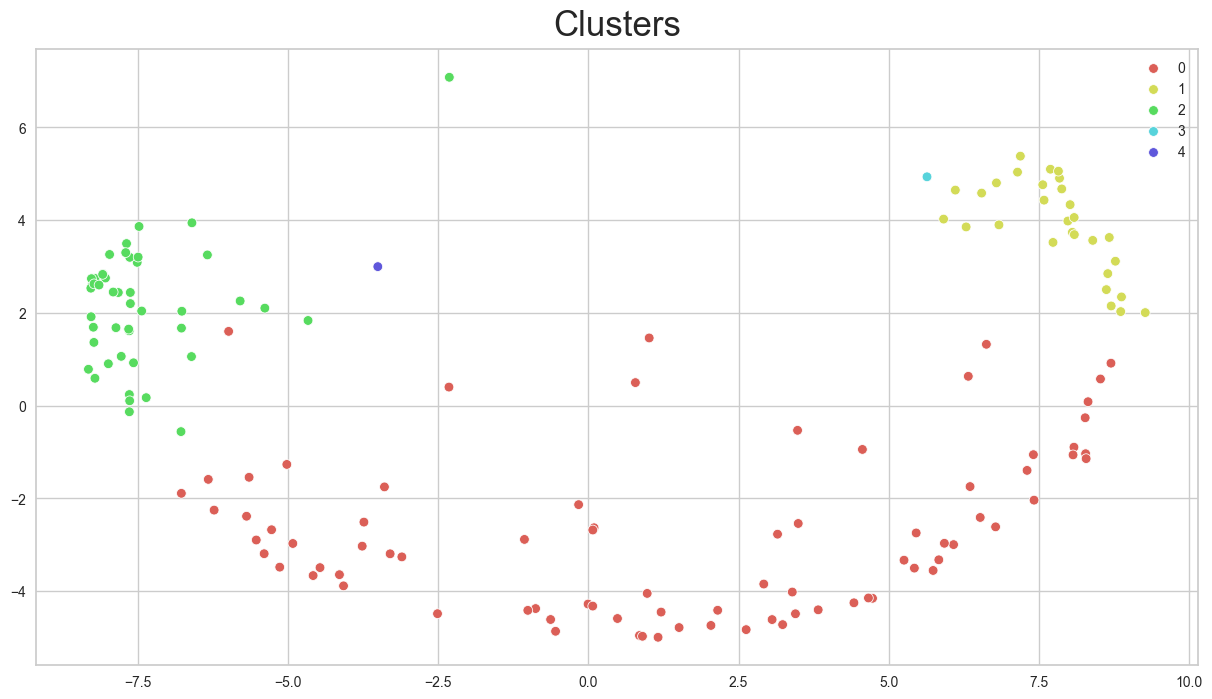

In [46]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=pca_1_2[:, 0], y=pca_1_2[:, 1],hue=y,palette=sns.color_palette('hls'))
plt.title('Clusters', size=25, pad=10)
plt.legend(loc=0, bbox_to_anchor=[1,1])
plt.show()

In [47]:
no_of_clusters = countries_kmeans.groupby(by='Labels')
child_mort_mean = no_of_clusters['child_mort'].mean()
exports_mean = no_of_clusters['exports'].mean()
health_mean = no_of_clusters['health'].mean()
imports_mean = no_of_clusters['imports'].mean()
income_mean = no_of_clusters['income'].mean()
inflation_mean = no_of_clusters['inflation'].mean()
life_expec_mean = no_of_clusters['life_expec'].mean()
total_fer_mean = no_of_clusters['total_fer'].mean()
gdpp_mean = no_of_clusters['gdpp'].mean()

In [48]:
cluster_analysis_df = pd.concat([pd.Series([0,1,2,3,4]),child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,
                                 total_fer_mean,gdpp_mean], axis=1)

In [49]:
cluster_analysis_df.columns = ["Labels","child_mort_mean","exports_mean","health_mean","imports_mean","income_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean"]

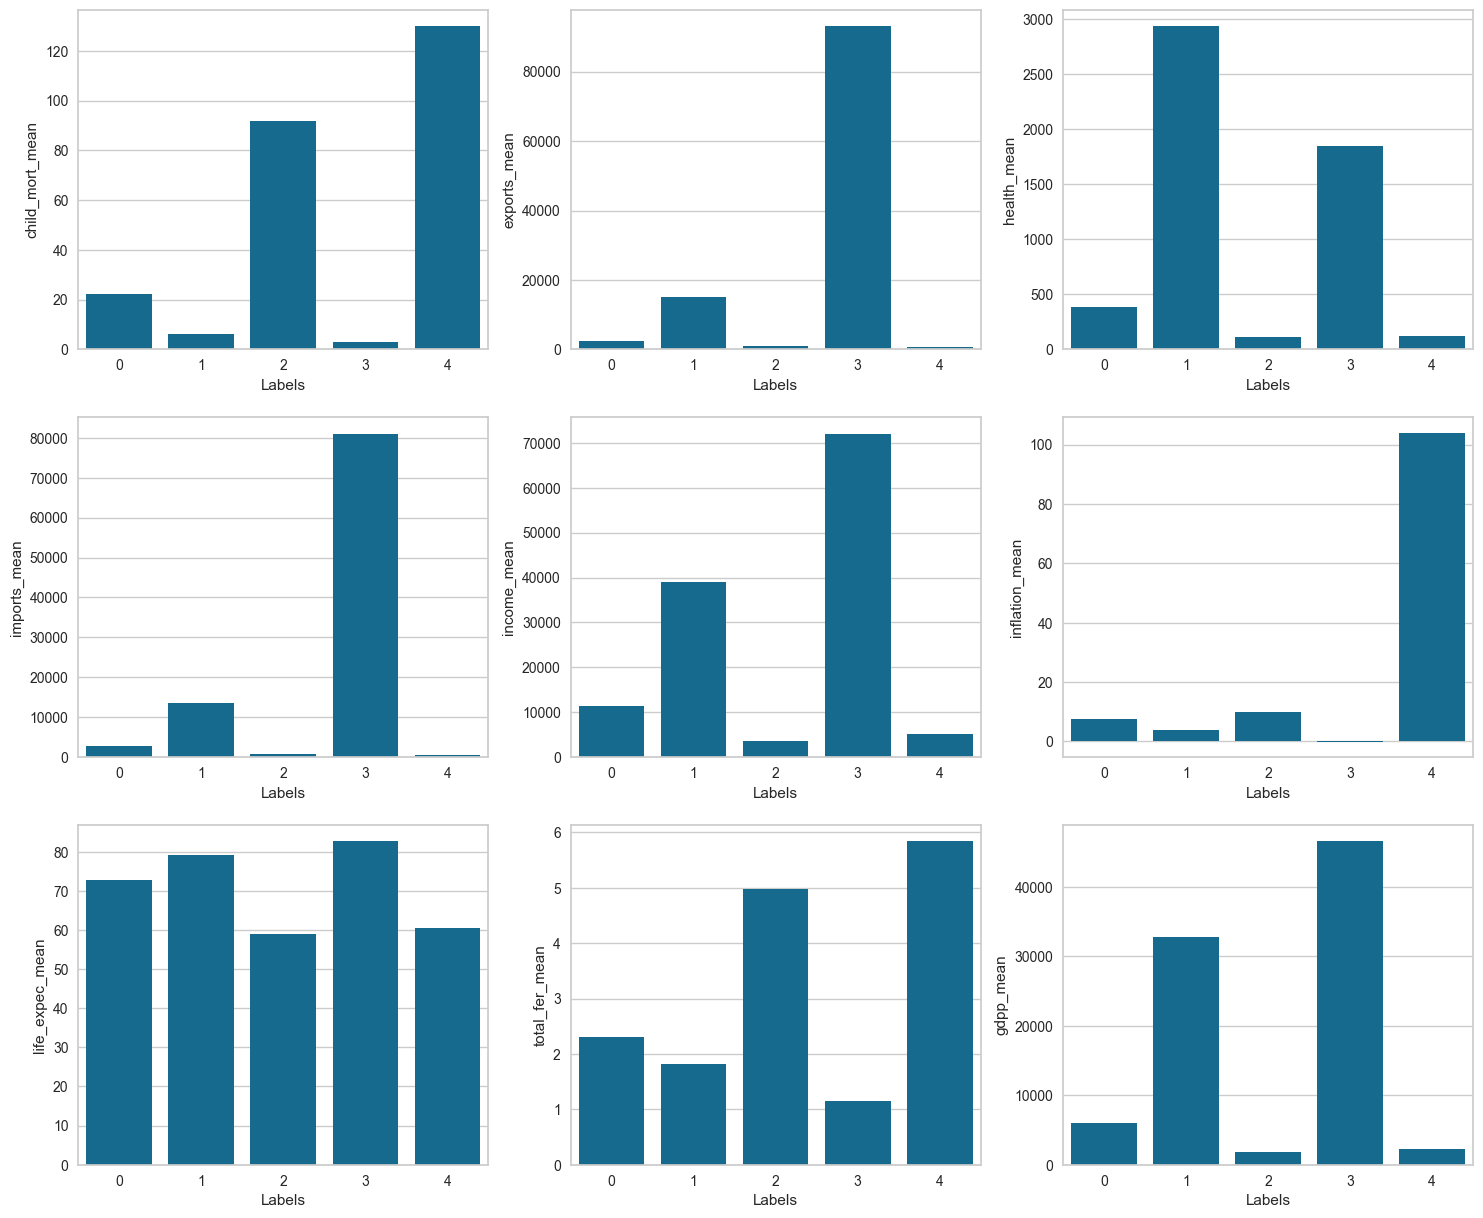

In [52]:
fig = plt.figure(figsize=(18,15))
for plot, feature in enumerate(cluster_analysis_df.columns[1:]):
    fig.add_subplot(3,3,plot+1)
    sns.barplot(x=cluster_analysis_df.Labels, y=cluster_analysis_df[feature])

In [51]:
clustered_kmeans=countries_kmeans[countries_kmeans['Labels']==0]
Help_needed_country = clustered_kmeans.sort_values(['gdpp','income','child_mort','health','inflation','life_expec','total_fer','imports','exports']).head(10)

In [57]:
Help_needed_country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Labels
109,Nepal,47.0,56.71360,31.0800,215.488000,1990,15.10,68.3,2.61,592,0
146,Tajikistan,52.4,109.96200,44.1324,432.468000,2110,12.50,69.6,3.51,738,0
12,Bangladesh,49.4,121.28000,26.6816,165.244000,2440,7.14,70.4,2.33,758,0
27,Cambodia,44.4,425.22600,44.6448,467.670000,2520,3.12,66.1,2.88,786,0
83,Kyrgyz Republic,29.6,454.08000,54.3840,718.960000,2790,10.00,68.5,3.10,880,0
107,Myanmar,64.4,1.07692,19.4636,0.651092,3720,7.04,66.8,2.41,988,0
164,Vietnam,23.3,943.20000,89.6040,1050.620000,4490,12.10,73.1,1.95,1310,0
69,India,58.8,305.10000,54.6750,365.850000,4410,8.98,66.2,2.60,1350,0
161,Uzbekistan,36.3,437.46000,80.1780,393.300000,4240,16.50,68.8,2.34,1380,0
102,Moldova,17.2,638.96000,190.7100,1279.550000,3910,11.10,69.7,1.27,1630,0
